<a href="https://www.kaggle.com/code/abhinandansamal/mohshardness-randomforestregressor?scriptVersionId=153715832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, loguniform, uniform
from scipy.stats import zscore
from scipy.stats import probplot, skew

from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error
from sklearn.pipeline import Pipeline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [2]:
# loading the train & test dataset
mohs_hardness_train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
mohs_hardness_test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [3]:
mohs_hardness_train_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
mohs_hardness_train_data.shape

(10407, 13)

In [5]:
mohs_hardness_test_data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [6]:
mohs_hardness_test_data.shape

(6939, 12)

In [7]:
mohs_hardness_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [8]:
mohs_hardness_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [9]:
# Check missing values in train data
mohs_hardness_train_data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [10]:
# Check missing values in test data
mohs_hardness_test_data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [11]:
# Check duplicate valuesin train data
mohs_hardness_train_data[mohs_hardness_train_data.duplicated()]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness


In [12]:
# Check duplicate values in test data
mohs_hardness_test_data[mohs_hardness_test_data.duplicated()]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average


In [13]:
mohs_hardness_train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [14]:
# Check values of features with 0 in train data
mohs_hardness_train_data[(mohs_hardness_train_data==0).any(axis=1)]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.000,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
22,22,0.000,0.755433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.80454,2.5
99,99,42.000,0.000000,0.000000,4.000000,0.000000,0.026725,2.727000,1.767000,0.000000,0.000000,0.80212,6.0
272,272,198.000,9.148824,4.814815,3.459459,8.462067,13.266033,2.065000,1.394000,0.574595,0.770755,0.00000,2.0
390,390,40.000,1.743160,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.00000,5.0
524,524,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50633,1.5
584,584,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.990000,2.015000,0.000000,0.000000,0.00000,1.5
751,751,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.91248,6.0
808,808,43.000,7.876748,7.500000,4.000000,14.996860,12.184250,2.727500,1.545000,0.710000,0.614430,0.00000,5.3
896,896,58.000,4.542664,15.666667,4.666667,36.871575,11.354767,1.976667,2.006667,0.920000,0.486507,0.00000,5.5


**There are many records where multiple features having value 0. These records will not add value for model prediction. We can remove those records.**

In [15]:
# Count the number of zero values in each row of train data
zero_values_in_rows = (mohs_hardness_train_data == 0).sum(axis=1)

# Set a threshold for the number of features with 0 values to consider a row for removal
threshold = 3

# Filter rows that have fewer than the threshold number of zero values
filtered_mohs_hardness_train_data = mohs_hardness_train_data[zero_values_in_rows < threshold]

In [16]:
filtered_mohs_hardness_train_data.shape

(10329, 13)

In [17]:
# Identify features with 0 values & get the count
(filtered_mohs_hardness_train_data == 0).any()

id                        True
allelectrons_Total       False
density_Total            False
allelectrons_Average     False
val_e_Average            False
atomicweight_Average     False
ionenergy_Average        False
el_neg_chi_Average       False
R_vdw_element_Average    False
R_cov_element_Average     True
zaratio_Average          False
density_Average           True
Hardness                 False
dtype: bool

In [18]:
# Count the number of records where 'R_cov_element_Average' feature have a value of 0
(filtered_mohs_hardness_train_data[['R_cov_element_Average']] == 0).any(axis=1).sum()

1

In [19]:
# Count the number of records where 'density_Average' feature have a value of 0
(filtered_mohs_hardness_train_data[['density_Average']] == 0).any(axis=1).sum()

41

In [20]:
# Create a SimpleImputer instance with strategy='mean'
imputer = SimpleImputer(strategy='mean')

In [21]:
# Features for which 0 values will be replaced
features_to_impute = ['R_cov_element_Average', 'density_Average']

# Replace 0 values with NaN in the selected features
filtered_mohs_hardness_train_data.loc[:, features_to_impute] = filtered_mohs_hardness_train_data.loc[:, features_to_impute].replace(0, pd.NA)

In [22]:
# Confirming whether the 0 values are replaced or not for 'R_cov_element_Average' feature
(filtered_mohs_hardness_train_data[['R_cov_element_Average']] == 0).any(axis=1).sum()

0

In [23]:
# Confirming whether the 0 values are replaced or not for 'density_Average' feature
(filtered_mohs_hardness_train_data[['density_Average']] == 0).any(axis=1).sum()

0

In [24]:
# Check the null values
filtered_mohs_hardness_train_data.isnull().sum()

id                        0
allelectrons_Total        0
density_Total             0
allelectrons_Average      0
val_e_Average             0
atomicweight_Average      0
ionenergy_Average         0
el_neg_chi_Average        0
R_vdw_element_Average     0
R_cov_element_Average     1
zaratio_Average           0
density_Average          41
Hardness                  0
dtype: int64

In [25]:
# Impute NaN values using SimpleImputer
filtered_mohs_hardness_train_data.loc[:, features_to_impute] = imputer.fit_transform(filtered_mohs_hardness_train_data.loc[:, features_to_impute].astype(dtype='Float64'))

In [26]:
# Confirming the NaN values imputed or not
filtered_mohs_hardness_train_data.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [27]:
# Checking the data type of features
filtered_mohs_hardness_train_data.dtypes

id                         int64
allelectrons_Total       float64
density_Total            float64
allelectrons_Average     float64
val_e_Average            float64
atomicweight_Average     float64
ionenergy_Average        float64
el_neg_chi_Average       float64
R_vdw_element_Average    float64
R_cov_element_Average     object
zaratio_Average          float64
density_Average           object
Hardness                 float64
dtype: object

In [28]:
# Ensure that the features are of numeric type after imputation
filtered_mohs_hardness_train_data['R_cov_element_Average'] = filtered_mohs_hardness_train_data['R_cov_element_Average'].astype(float)
filtered_mohs_hardness_train_data['density_Average'] = filtered_mohs_hardness_train_data['density_Average'].astype(float)

/tmp/ipykernel_19/2532774420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mohs_hardness_train_data['R_cov_element_Average'] = filtered_mohs_hardness_train_data['R_cov_element_Average'].astype(float)
/tmp/ipykernel_19/2532774420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mohs_hardness_train_data['density_Average'] = filtered_mohs_hardness_train_data['density_Average'].astype(float)


In [29]:
# Check the data type again for confirmation
filtered_mohs_hardness_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10329 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10329 non-null  int64  
 1   allelectrons_Total     10329 non-null  float64
 2   density_Total          10329 non-null  float64
 3   allelectrons_Average   10329 non-null  float64
 4   val_e_Average          10329 non-null  float64
 5   atomicweight_Average   10329 non-null  float64
 6   ionenergy_Average      10329 non-null  float64
 7   el_neg_chi_Average     10329 non-null  float64
 8   R_vdw_element_Average  10329 non-null  float64
 9   R_cov_element_Average  10329 non-null  float64
 10  zaratio_Average        10329 non-null  float64
 11  density_Average        10329 non-null  float64
 12  Hardness               10329 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [30]:
features_to_exclude_train = ['id', 'Hardness']
remaining_features_train_df = filtered_mohs_hardness_train_data.drop(columns=features_to_exclude_train)
remaining_features_train_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [31]:
features_to_exclude_test = ['id']
remaining_features_test_df = mohs_hardness_test_data.drop(columns=features_to_exclude_test)
remaining_features_test_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


<h2 style="color:red">Outlier Detection & Handling</h2>

In [32]:
# Calculate z-scores for each feature of train data
z_scores = zscore(remaining_features_train_df)

# Set a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Identify outliers based on the threshold
outliers = (abs(z_scores) > threshold).any(axis=1)
# Removing the outliers
df_train_no_outliers = filtered_mohs_hardness_train_data[~outliers]
df_train_no_outliers.shape

(9324, 13)

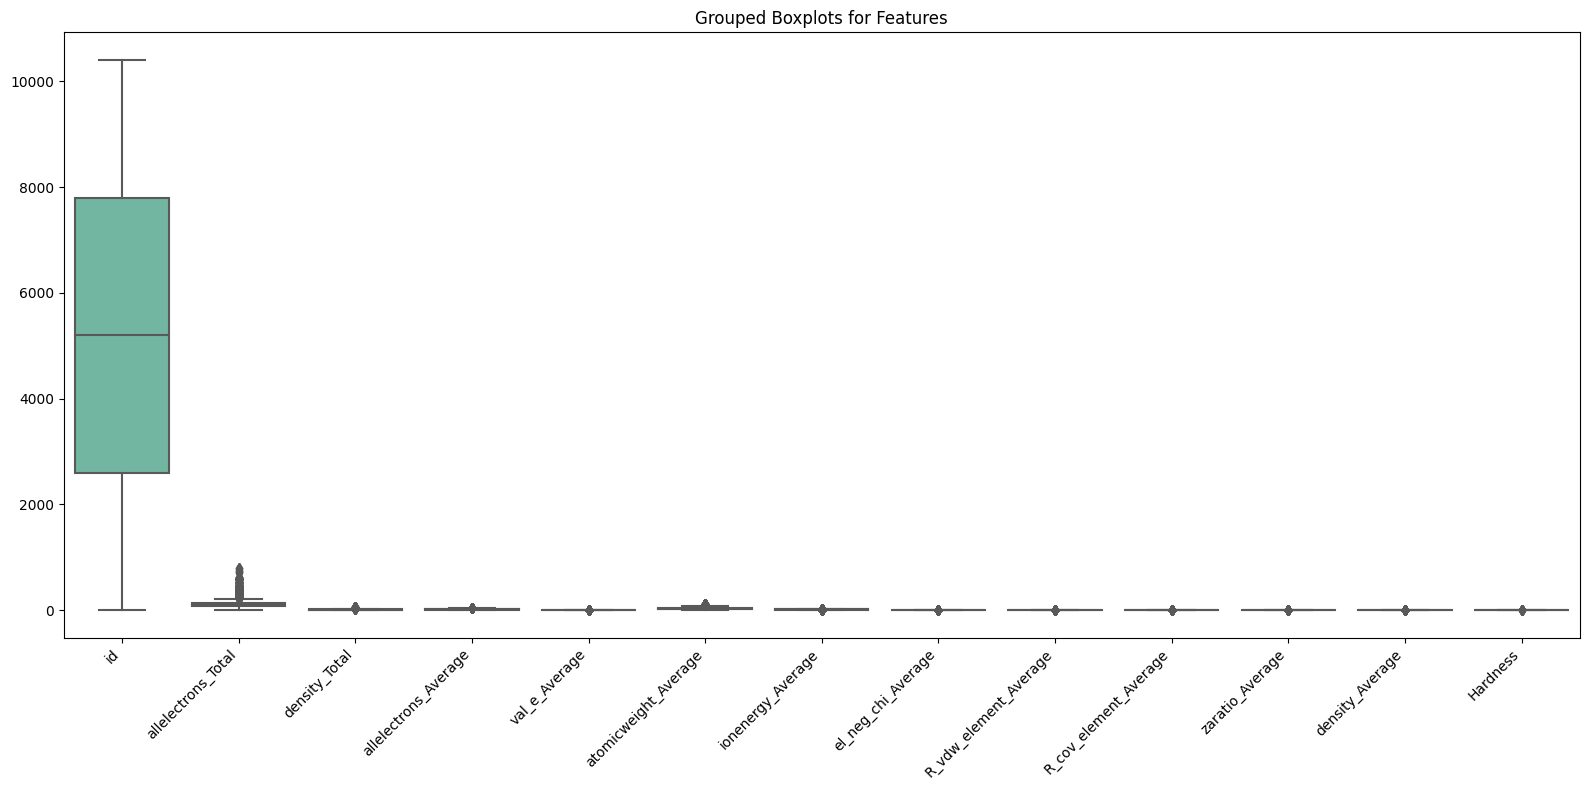

In [33]:
# Plot grouped Boxplot to view the distribution & potential outliers for the features
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_train_no_outliers, palette='Set2')
# Adjust layout
plt.title('Grouped Boxplots for Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [34]:
# Calculate z-scores for each feature of test data
# z_scores_test = zscore(remaining_features_test_df)

# Set a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
# threshold = 3

# Identify outliers based on the threshold
# outliers_t = (abs(z_scores_test) > threshold).any(axis=1)
# Removing the outliers
# df_test_no_outliers = mohs_hardness_test_data[~outliers_t]
# df_test_no_outliers.shape

<h2 style='color:red'>Data Distribution & Skewness Check</h2>

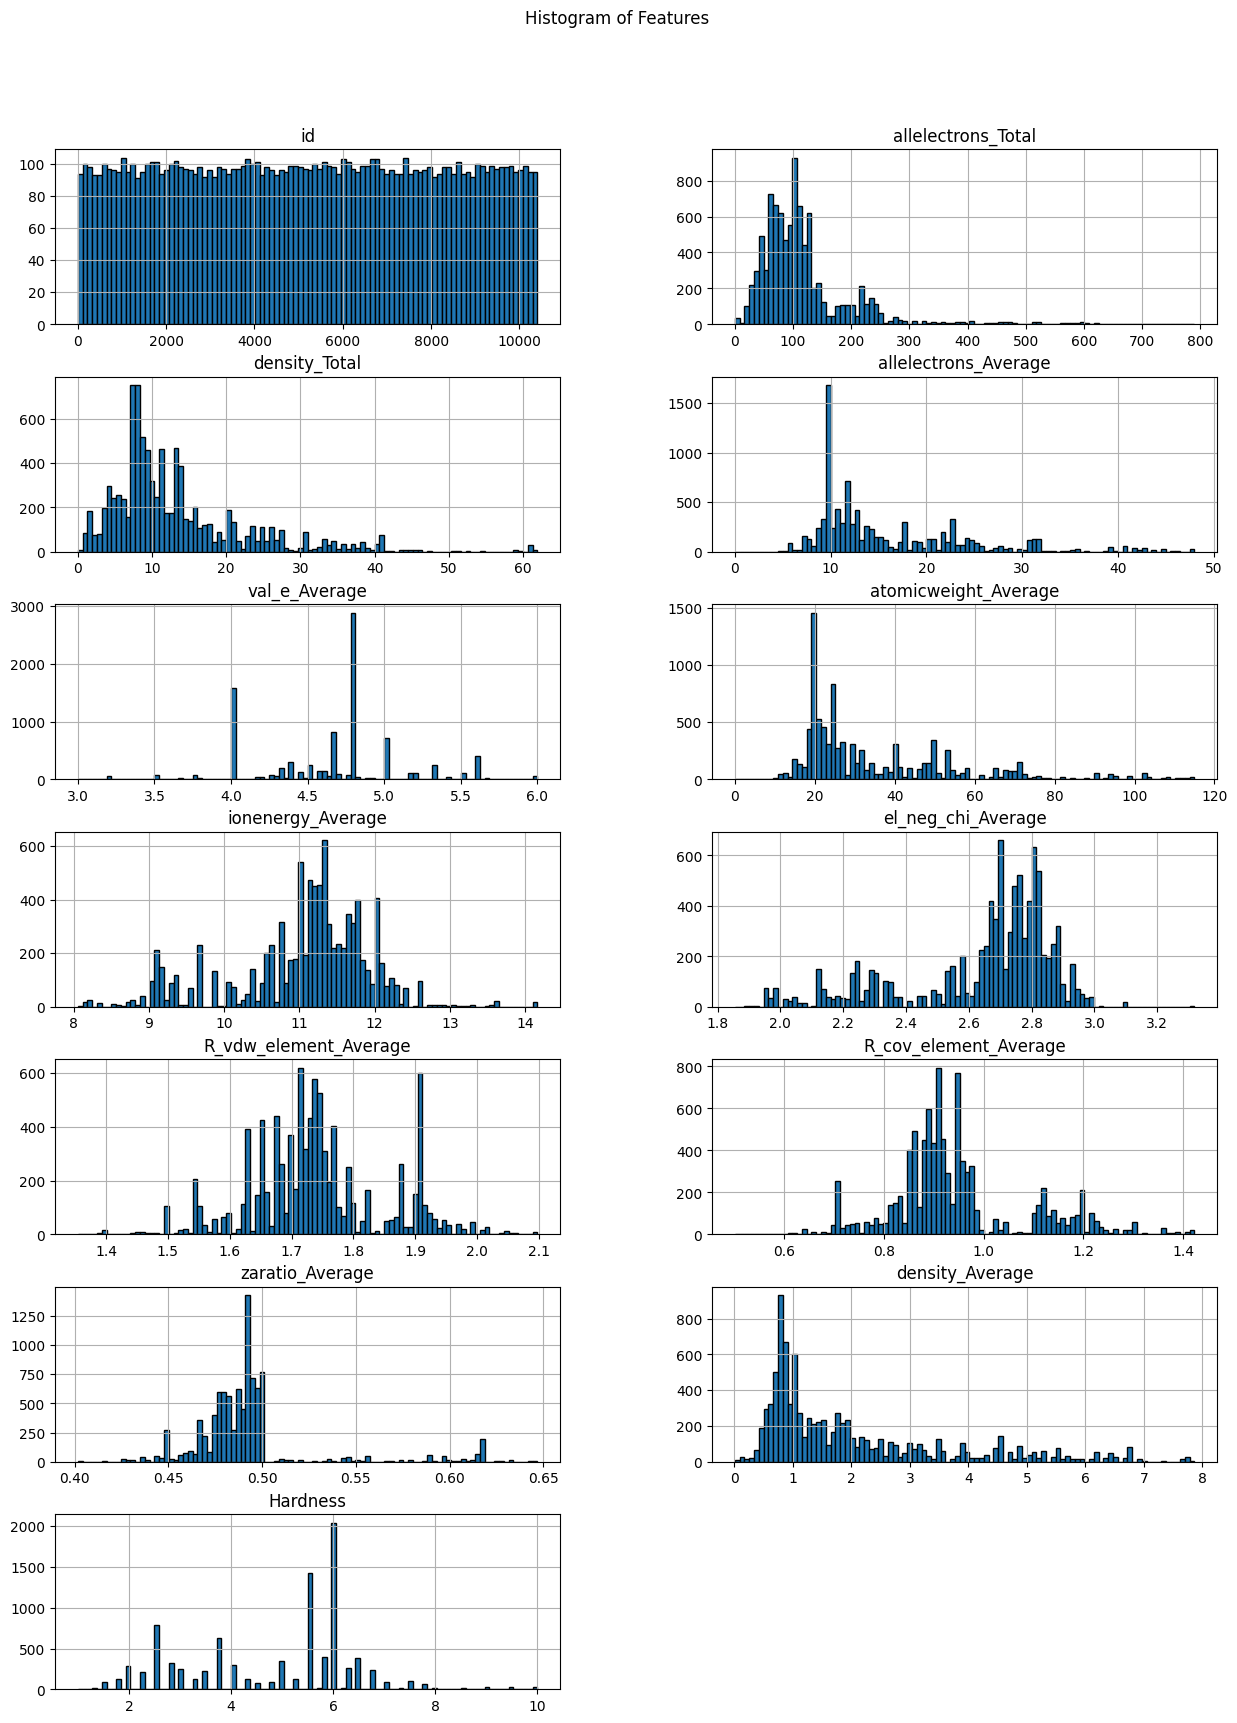

In [35]:
# data distribution of each feature of train data using histogram
num_bins = int(np.sqrt(len(df_train_no_outliers)))

df_train_no_outliers.hist(bins=num_bins, figsize=(15, 20), edgecolor="black", layout=(7, 2))
plt.suptitle("Histogram of Features", x=0.5, y=0.95, ha="center", fontsize="large")
plt.style.use("ggplot")
plt.show()

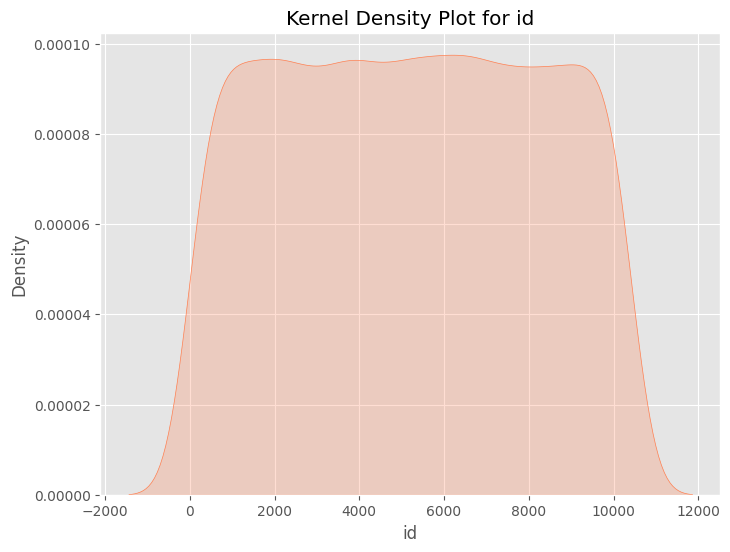

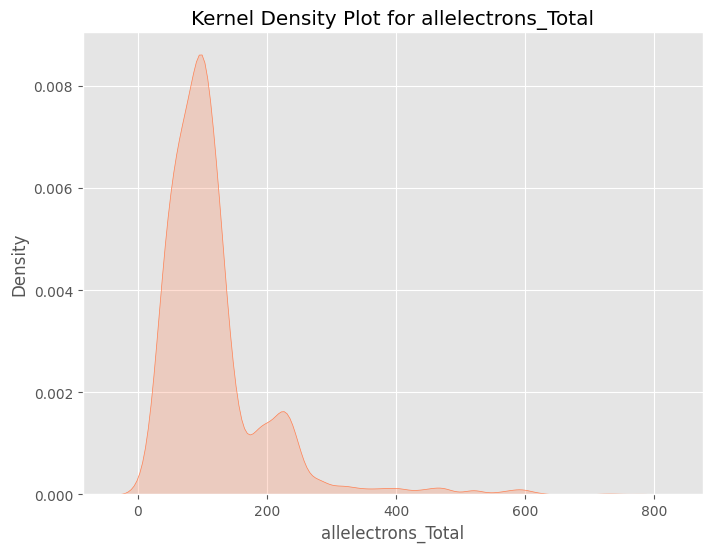

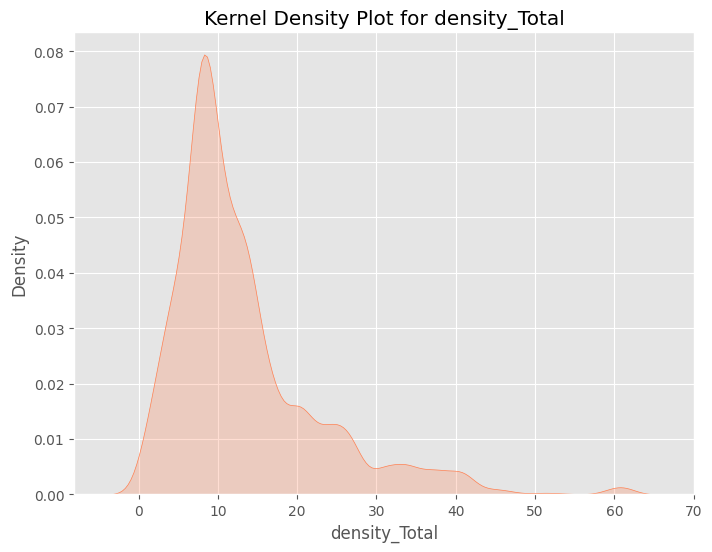

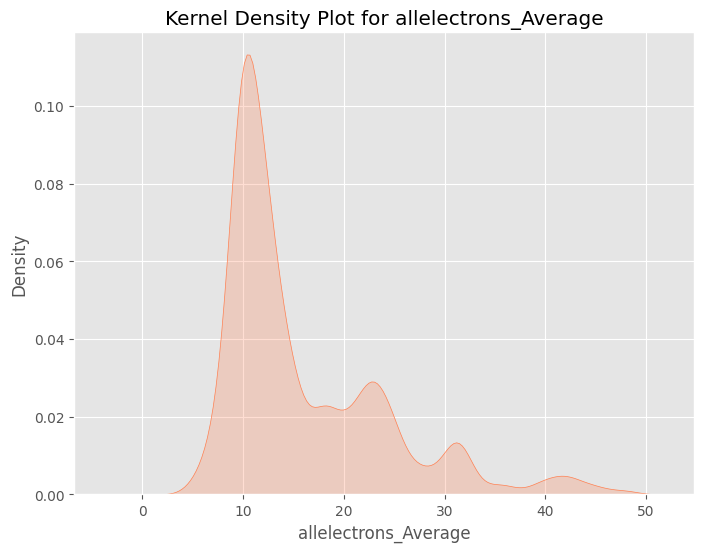

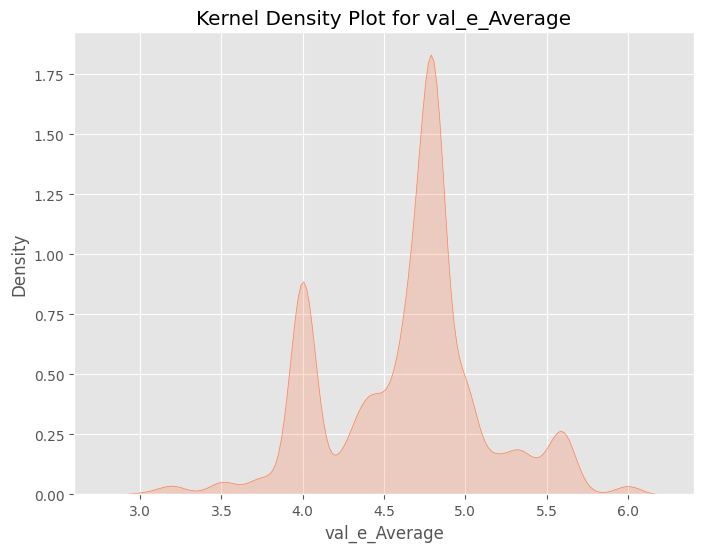

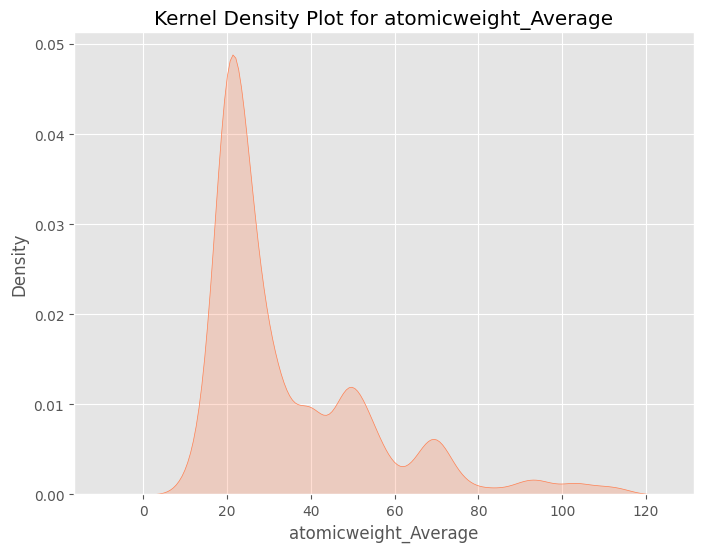

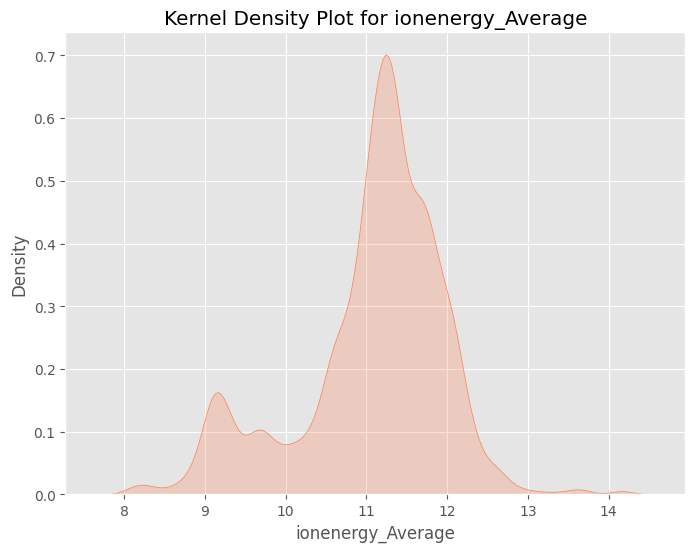

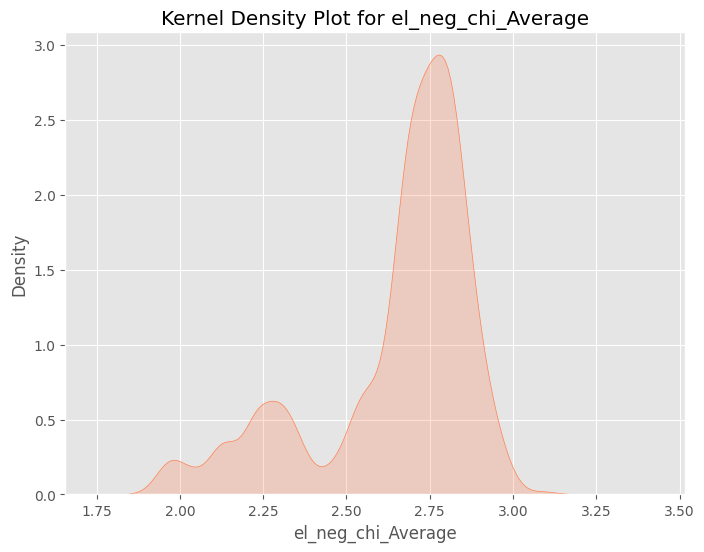

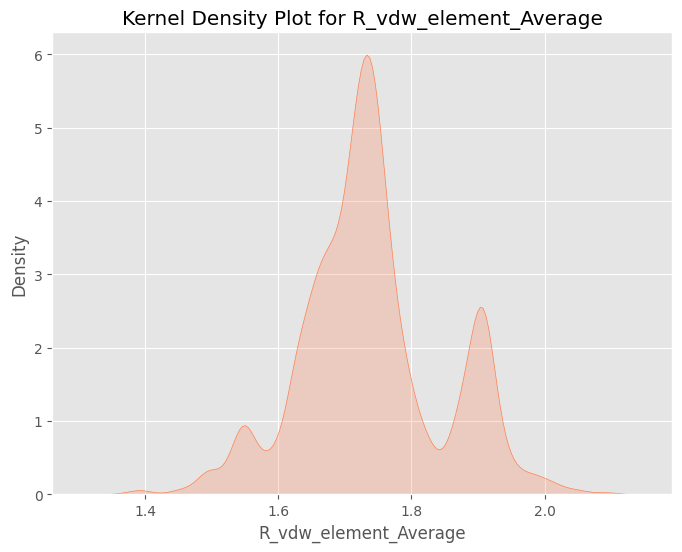

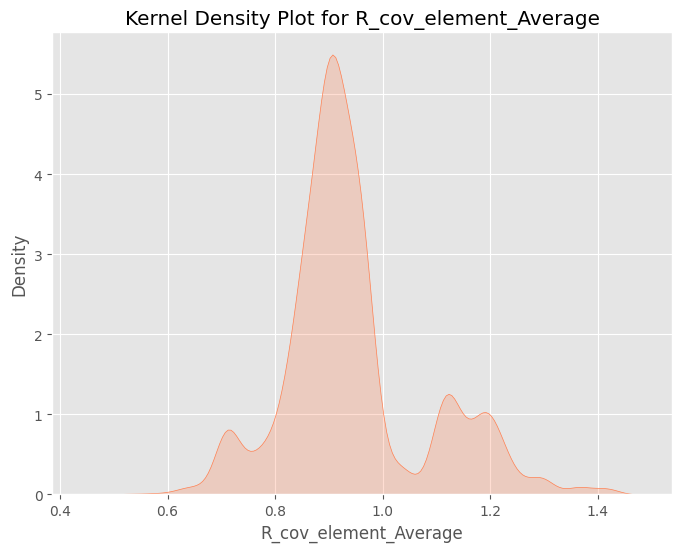

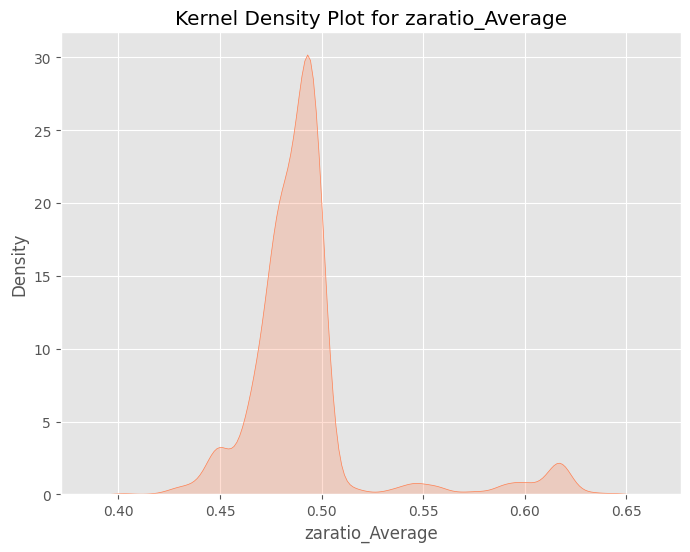

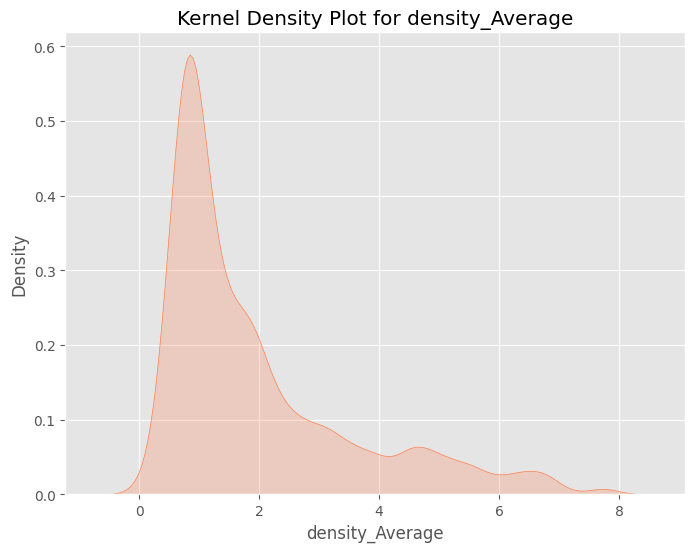

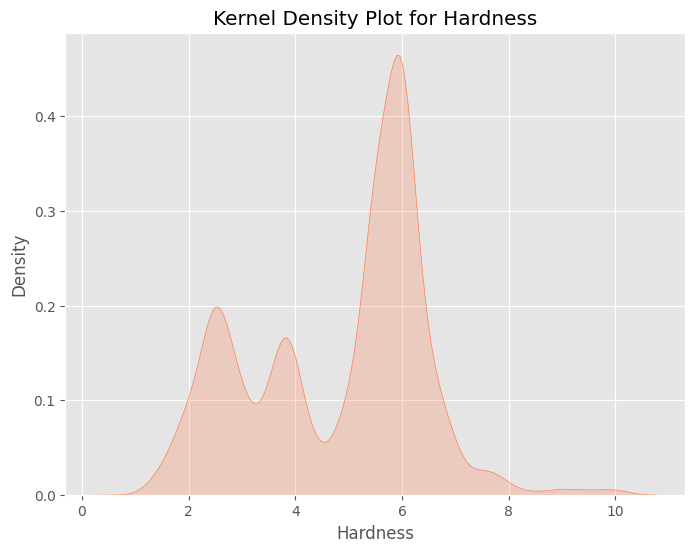

In [36]:
# data distribution of each feature of Train data using Kernel Density Plot
for column in df_train_no_outliers.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df_train_no_outliers[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

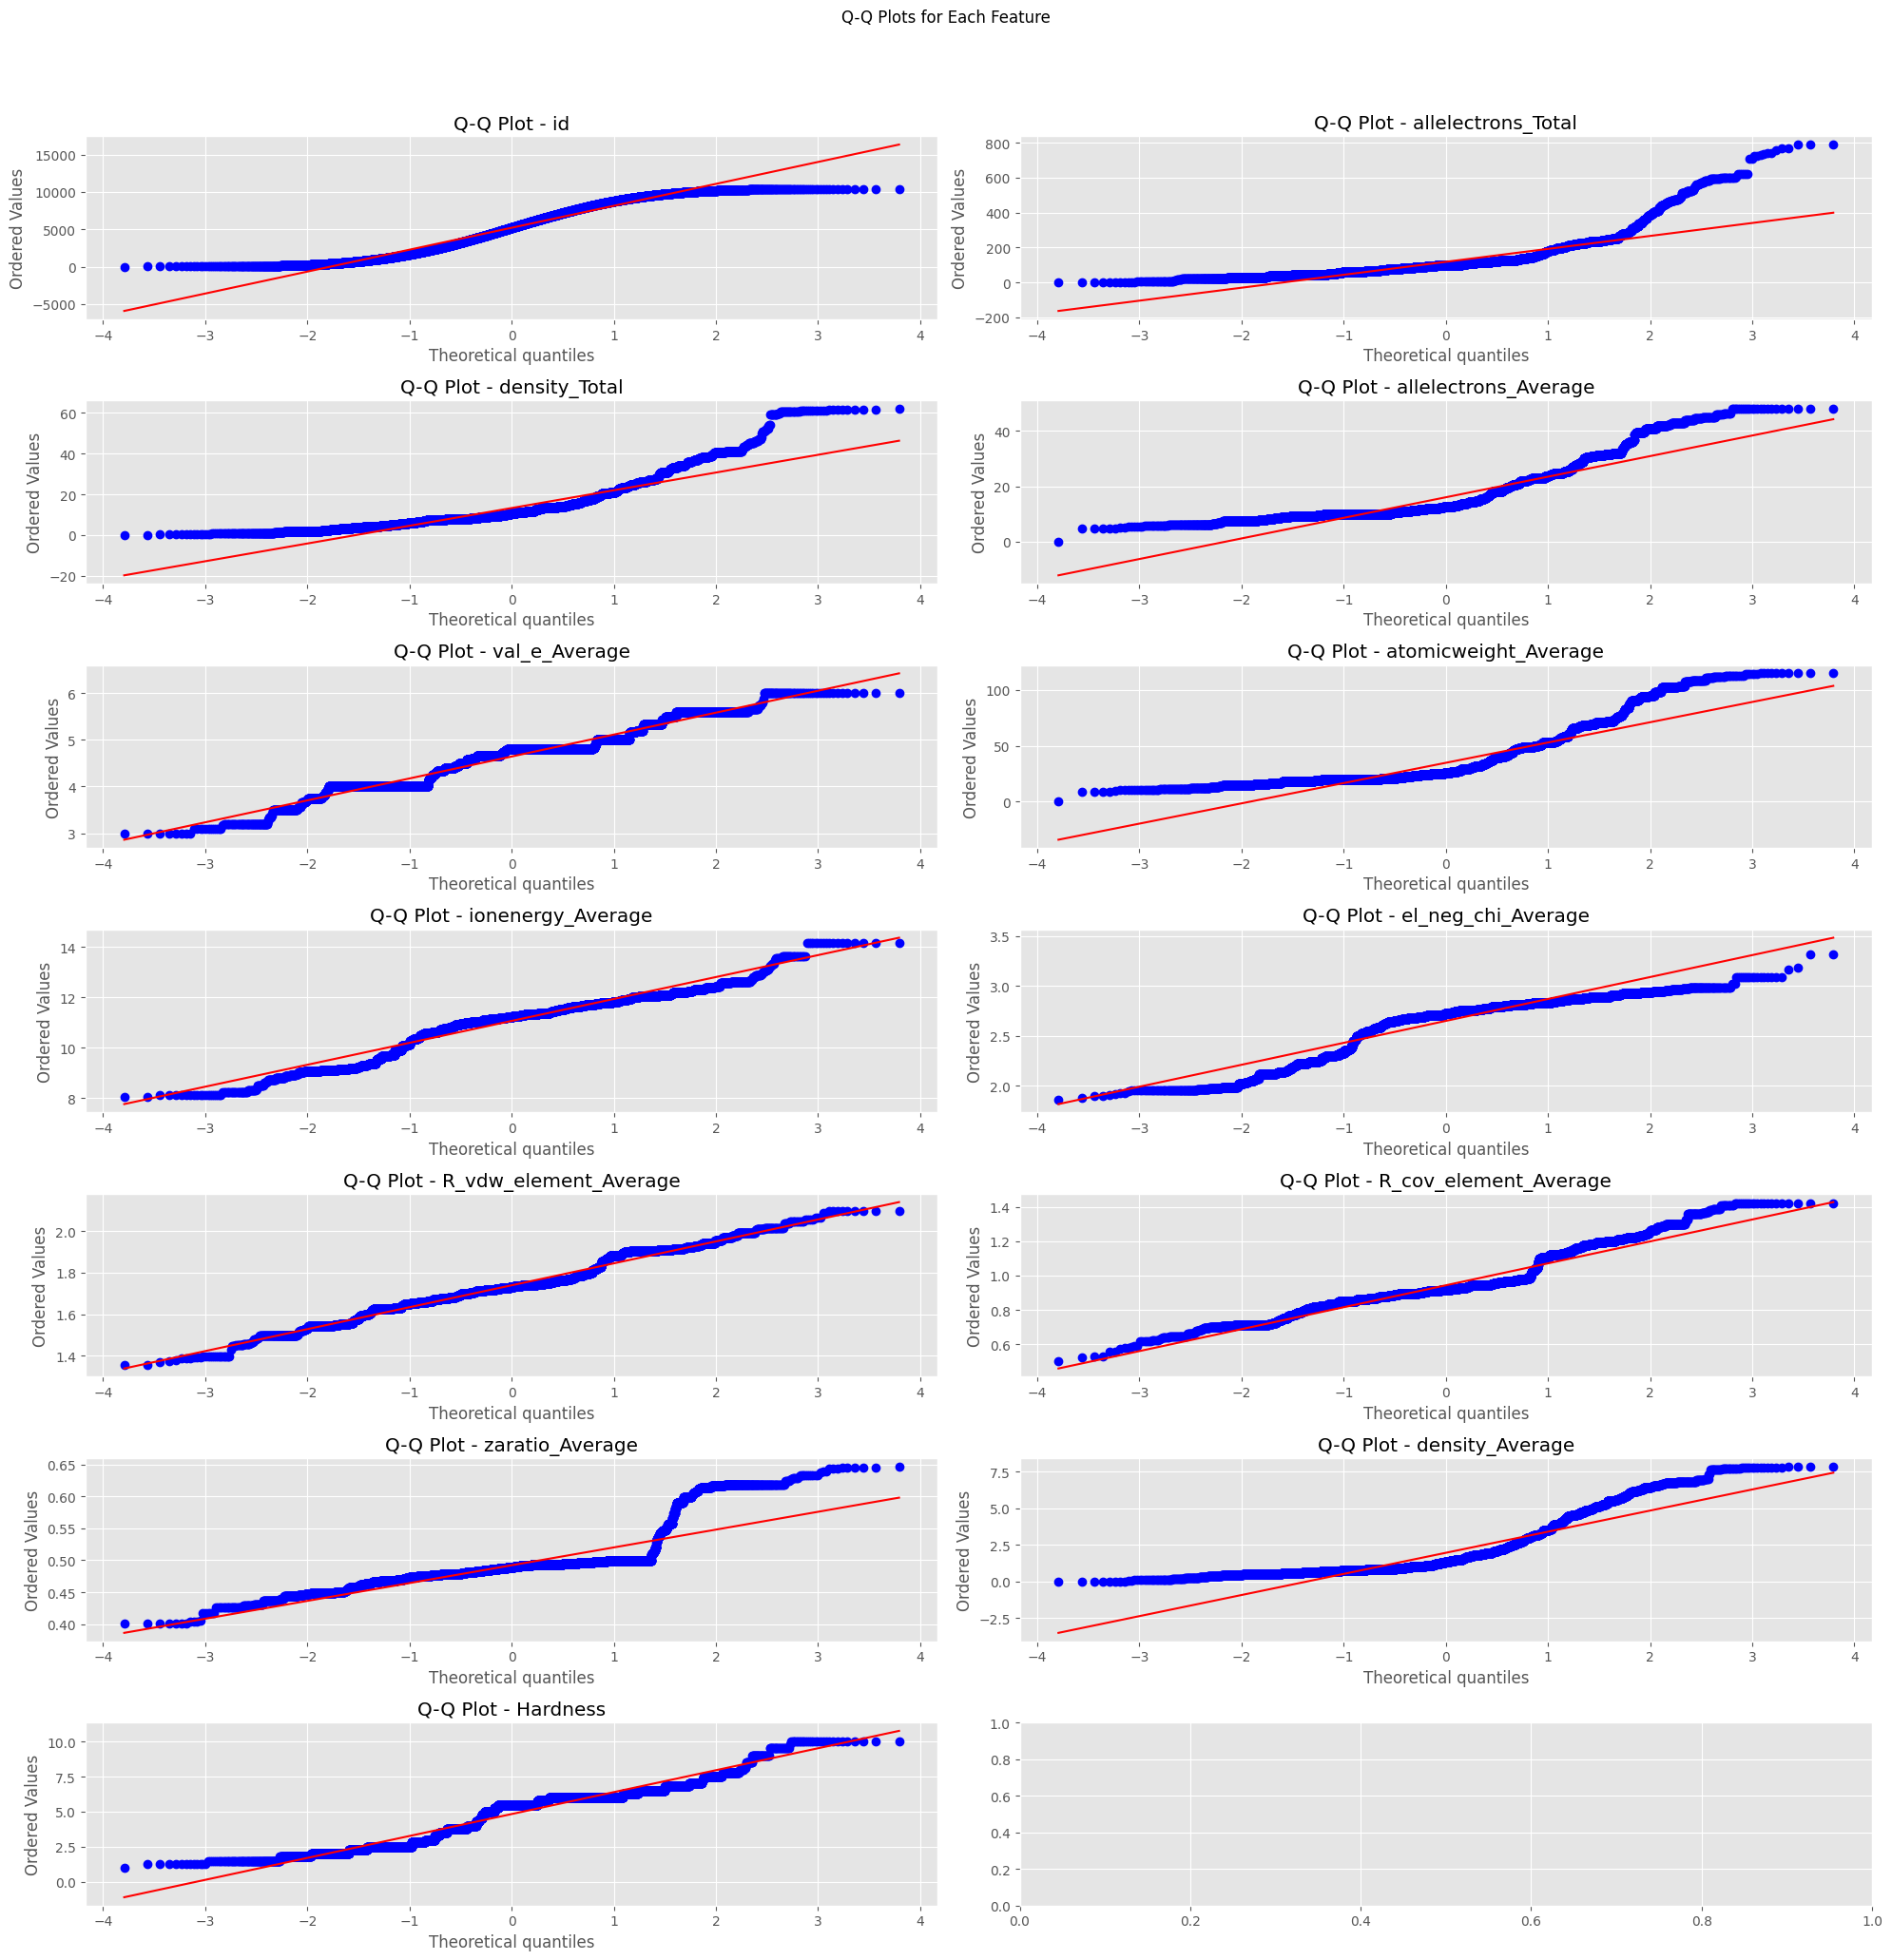

In [37]:
# Q-Q Plot to understand data distribution

# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = df_train_no_outliers.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(df_train_no_outliers.columns, axes)):
    probplot(df_train_no_outliers[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Skewness coefficients for each feature:
id                       0.001159
allelectrons_Total       2.855353
density_Total            1.801102
allelectrons_Average     1.507199
val_e_Average           -0.158942
atomicweight_Average     1.611300
ionenergy_Average       -0.783612
el_neg_chi_Average      -1.245113
R_vdw_element_Average    0.194971
R_cov_element_Average    0.836948
zaratio_Average          2.377030
density_Average          1.476034
Hardness                -0.258455
dtype: float64


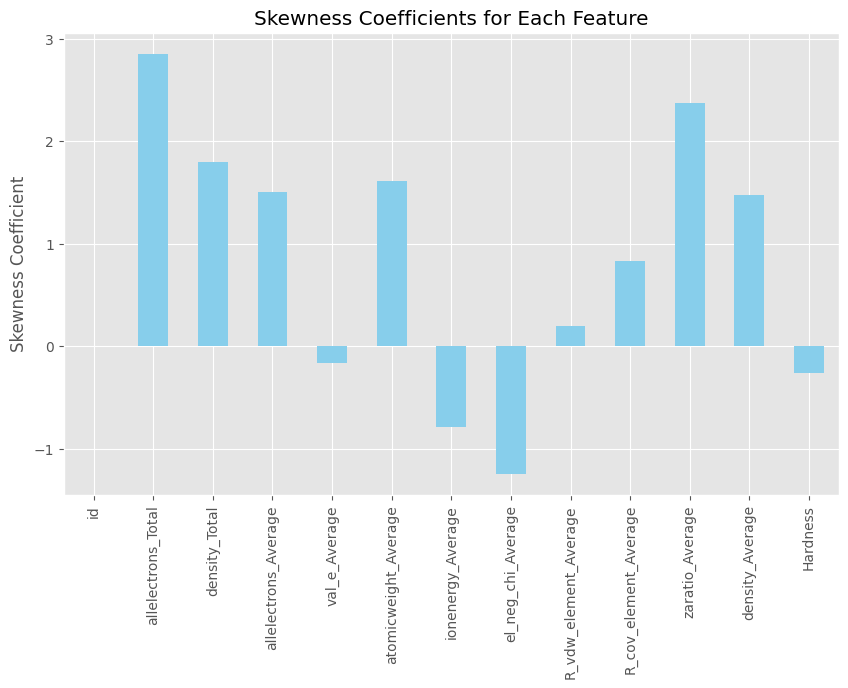

In [38]:
# measure skewness of train data using skewness metrics 'skewness coefficient' & Q-Q Plot
# calculate skewness for each feature
skewness_per_feature = df_train_no_outliers.skew()

# Display skewness coefficients
print("Skewness coefficients for each feature:")
print(skewness_per_feature)

# Plot skewness coefficients
plt.figure(figsize=(10, 6))
skewness_per_feature.plot(kind='bar', color='skyblue')
plt.title('Skewness Coefficients for Each Feature')
plt.ylabel('Skewness Coefficient')
plt.show()

- The data distribution in 'allelectrons_Total', 'density_Total', 'allelectrons_Average', 'atomicweight_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average' & 'density_Average' features are more or less right skewed.
- The data distribution in 'val_e_Average', 'ionenergy_Average' & 'el_neg_chi_Average'  features are more or less left skewed.

<h2 style='color:red'>Variance Check</h2>

In [39]:
print("Variance of each feature in train data\n", df_train_no_outliers.var())

Variance of each feature in train data
 id                       8.997374e+06
allelectrons_Total       7.412760e+03
density_Total            9.024090e+01
allelectrons_Average     6.720520e+01
val_e_Average            2.340951e-01
atomicweight_Average     4.077250e+02
ionenergy_Average        8.167836e-01
el_neg_chi_Average       5.620411e-02
R_vdw_element_Average    1.151608e-02
R_cov_element_Average    1.778281e-02
zaratio_Average          1.114726e-03
density_Average          2.555485e+00
Hardness                 2.642051e+00
dtype: float64


In [40]:
# Low variance features in train data
num_variable_var = []

for i in range(0, len(df_train_no_outliers.var())):
    # Setting the threshold as 0.1%
    if df_train_no_outliers.var()[i] <= 0.1:
        num_variable_var.append(df_train_no_outliers.columns[i])

num_variable_var

['el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average']

In [41]:
# dropping the low variance features from train data
high_variance_df = df_train_no_outliers.drop(num_variable_var, axis=1)
high_variance_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,1.86481,6.0


In [42]:
# dropping the low variance features from test data
high_variance_test_df = mohs_hardness_test_data.drop(num_variable_var, axis=1)
high_variance_test_df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,0.93456


In [43]:
# Split the data into training and validation set
X_train = high_variance_df.drop('Hardness', axis=1)
y_train = high_variance_df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<h2 style='color:red'>Data Transformation to handle skewness</h2>

In [44]:
# drop id & Hardness columns from train & validation data
X_train.drop(["id"], axis=1, inplace=True)
X_val.drop(["id"], axis=1, inplace=True)

# drop id column from test data
high_variance_test_df.drop(["id"], axis=1, inplace=True)

In [45]:
X_train.columns[X_train.skew() > 0]

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'atomicweight_Average', 'density_Average'],
      dtype='object')

In [46]:
X_train.columns[X_train.skew() < 0]

Index(['val_e_Average', 'ionenergy_Average'], dtype='object')

In [47]:
# Apply log transformation to right-skewed features of train data
log_transformed_right_xtrain = np.log1p(X_train[X_train.columns[X_train.skew() > 0]])

# Apply log transformation to left-skewed features (reverse the sign) of train data
log_transformed_left_xtrain = -np.log1p(X_train[X_train.columns[X_train.skew() < 0]])

# Combine the transformed features with the untransformed ones
log_transformed_df_xtrain = pd.concat([log_transformed_right_xtrain, log_transformed_left_xtrain], axis=1)

# print(log_transformed_df_xtrain)

In [48]:
# Display skewness after log transformation
print("\nSkewness after log transformation:")
print(log_transformed_df_xtrain.skew())


Skewness after log transformation:
allelectrons_Total     -0.323552
density_Total          -0.139527
allelectrons_Average    0.660513
atomicweight_Average    0.648250
density_Average         0.753702
val_e_Average           0.476633
ionenergy_Average       1.033666
dtype: float64


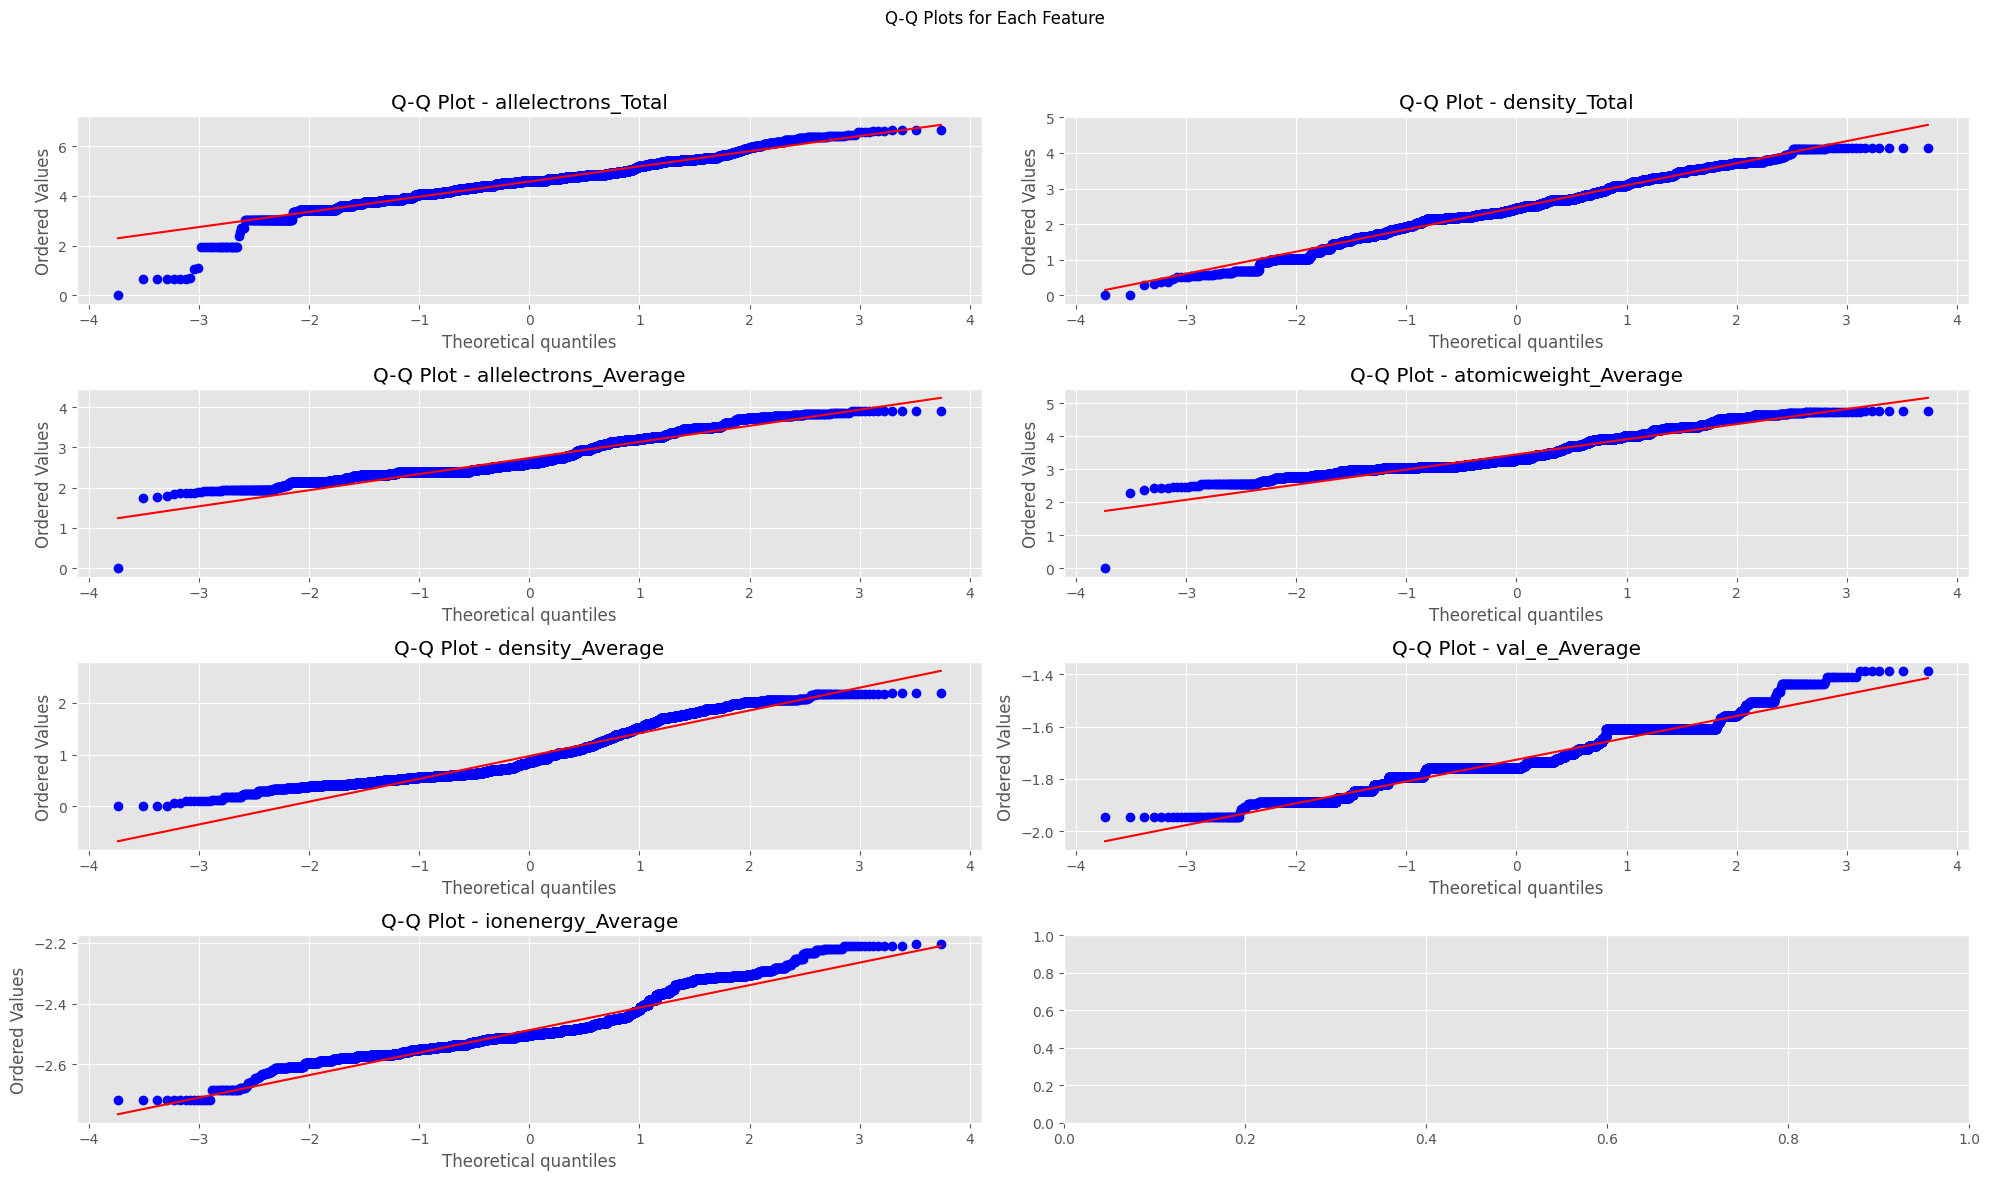

In [49]:
# Plot Q-Q plots for each feature of train data
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = log_transformed_df_xtrain.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, (column, ax) in enumerate(zip(log_transformed_df_xtrain.columns, axes)):
    probplot(log_transformed_df_xtrain[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [50]:
# Apply log transformation to right-skewed features of validation data
log_transformed_right_xval = np.log1p(X_val[X_val.columns[X_val.skew() > 0]])

# Apply log transformation to left-skewed features (reverse the sign) of validation data
log_transformed_left_xval = -np.log1p(X_val[X_val.columns[X_val.skew() < 0]])

# Combine the transformed features with the untransformed ones
log_transformed_df_xval = pd.concat([log_transformed_right_xval, log_transformed_left_xval], axis=1)

# print(log_transformed_df_xval)

In [51]:
# Apply log transformation to right-skewed features of test data
log_transformed_right_test = np.log1p(high_variance_test_df[['allelectrons_Total', 'density_Total', 'allelectrons_Average',
                                                           'atomicweight_Average', 'density_Average']])

# Apply log transformation to left-skewed features (reverse the sign) of test data
log_transformed_left_test = -np.log1p(high_variance_test_df[['val_e_Average', 'ionenergy_Average']])

# Combine the transformed features with the untransformed ones
log_transformed_test_df = pd.concat([log_transformed_right_test, log_transformed_left_test], axis=1)

# print(log_transformed_test_df)

<h2 style='color:red'>Feature Scaling</h2>

In [52]:
# Instantiate RobustScaler
scaler = RobustScaler()

# Feature scaling on training data
scaled_df = pd.DataFrame(scaler.fit_transform(log_transformed_df_xtrain), columns=log_transformed_df_xtrain.columns)
scaled_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,atomicweight_Average,density_Average,val_e_Average,ionenergy_Average
0,-0.518872,-0.186730,-0.033534,0.016558,0.045595,0.000000,-0.160877
1,0.794091,-0.057032,-0.305591,-0.190481,-0.198067,0.633153,1.017539
2,0.774718,0.828346,1.276122,1.174909,0.939290,-0.404160,-0.028720
3,0.121826,-0.399788,-0.477958,-0.602353,-0.474990,0.000000,0.062581
4,0.107096,0.226752,-0.102950,-0.060379,-0.243970,0.000000,-0.105246


In [53]:
# Feature scaling on validation data
scaled_df_val = pd.DataFrame(scaler.fit_transform(log_transformed_df_xval), columns=log_transformed_df_xval.columns)
scaled_df_val.head()

,allelectrons_Total,density_Total,allelectrons_Average,atomicweight_Average,density_Average,val_e_Average,ionenergy_Average
0,0.314946,0.293624,0.678714,0.706514,0.390053,1.897572,-0.376776
1,0.235020,-0.477230,-0.109562,-0.080395,0.367342,0.000000,0.037355
2,0.000000,-0.378358,-0.309895,-0.317919,-0.303801,-0.433436,-0.092630
3,-1.327990,-0.497440,-0.212595,-0.313522,-0.489222,2.553364,-0.928717
4,-0.048190,0.303018,-0.049342,-0.056915,0.280187,0.972941,0.207969


In [54]:
# Feature scaling on test data
scaled_test_df = pd.DataFrame(scaler.fit_transform(log_transformed_test_df), columns=log_transformed_test_df.columns)
scaled_test_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,atomicweight_Average,density_Average,val_e_Average,ionenergy_Average
0,3.468830,3.262116,1.326615,1.323778,0.234810,-0.594058,1.856250
1,-0.166629,-0.088226,0.446692,0.471397,0.034494,-0.928917,-0.797494
2,0.235020,-0.394145,-0.110172,-0.136470,-0.372444,-0.058335,0.168512
3,0.000000,-0.196906,-0.294285,-0.288652,-0.087744,-0.058335,-0.797494
4,-0.942566,-1.164809,-0.176320,-0.148907,-0.265532,0.941665,-0.072867


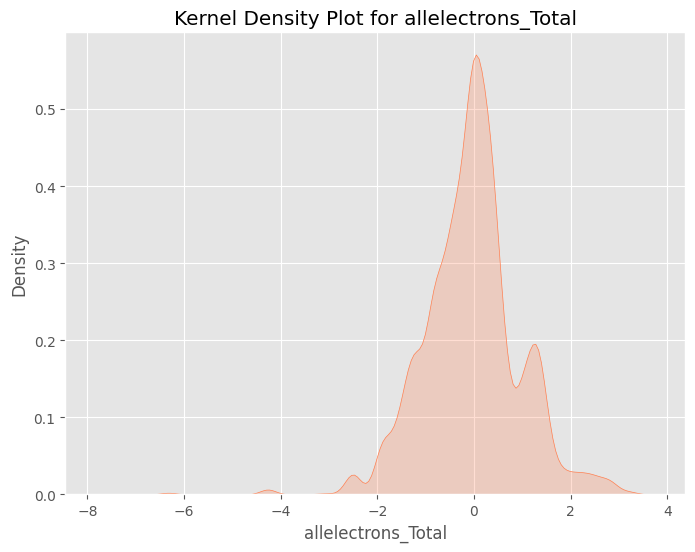

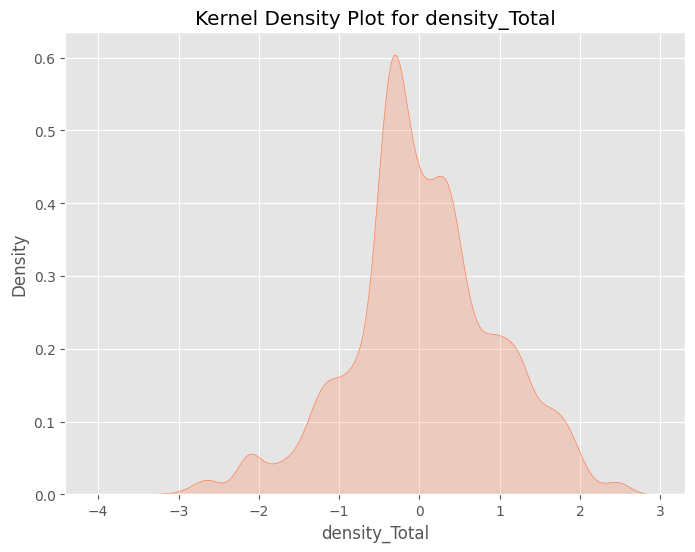

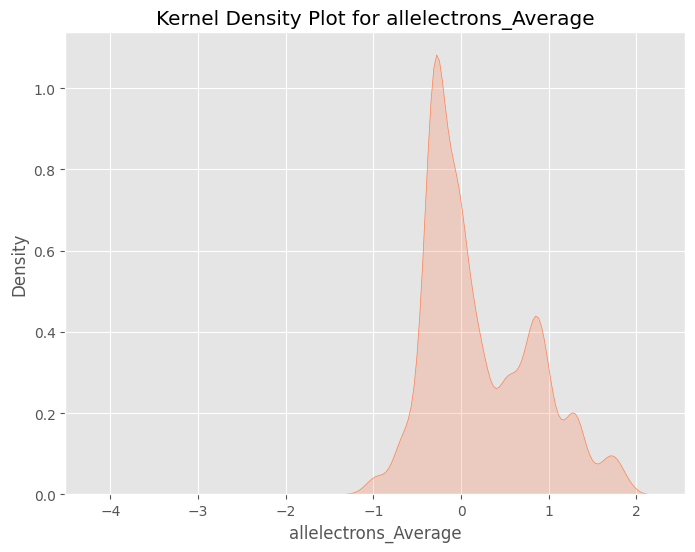

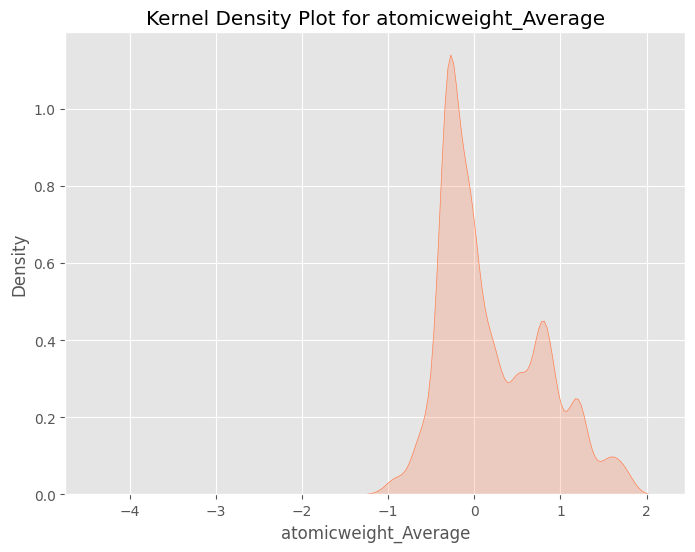

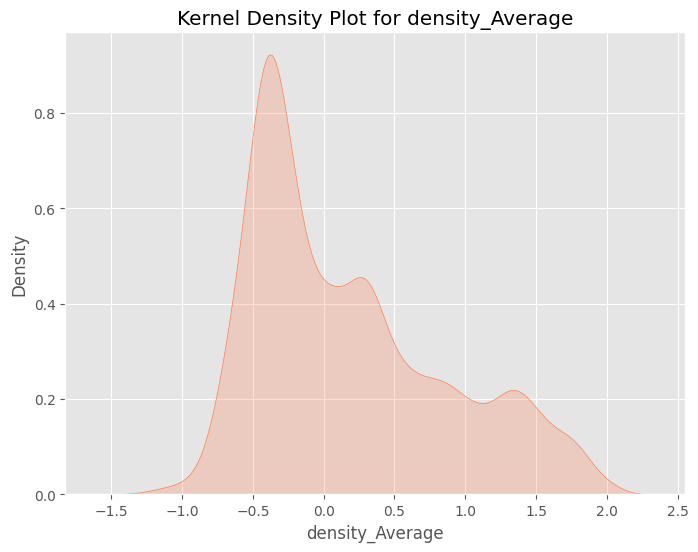

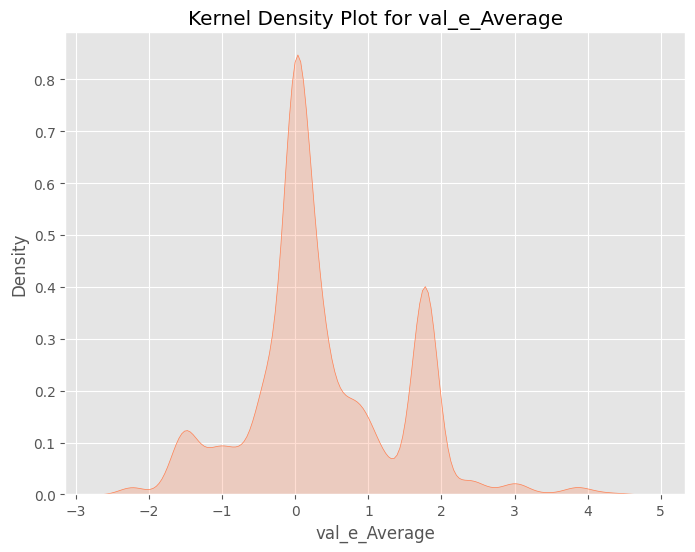

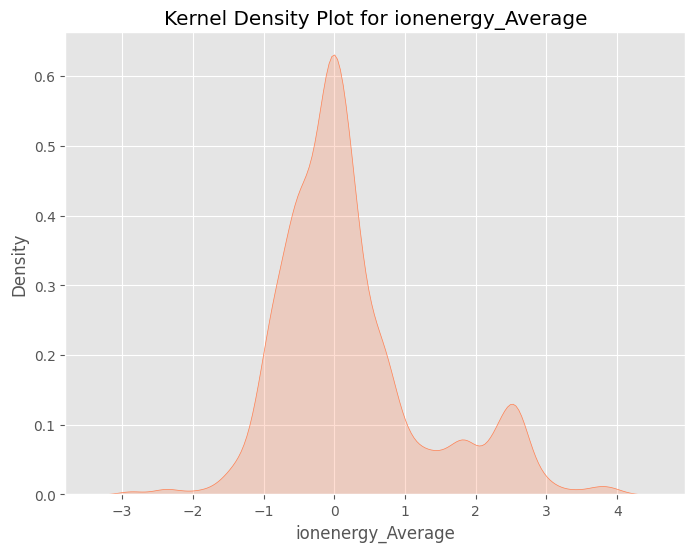

In [55]:
# data distribution of each scaled training feature using Kernel Density Plot
for column in scaled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(scaled_df[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

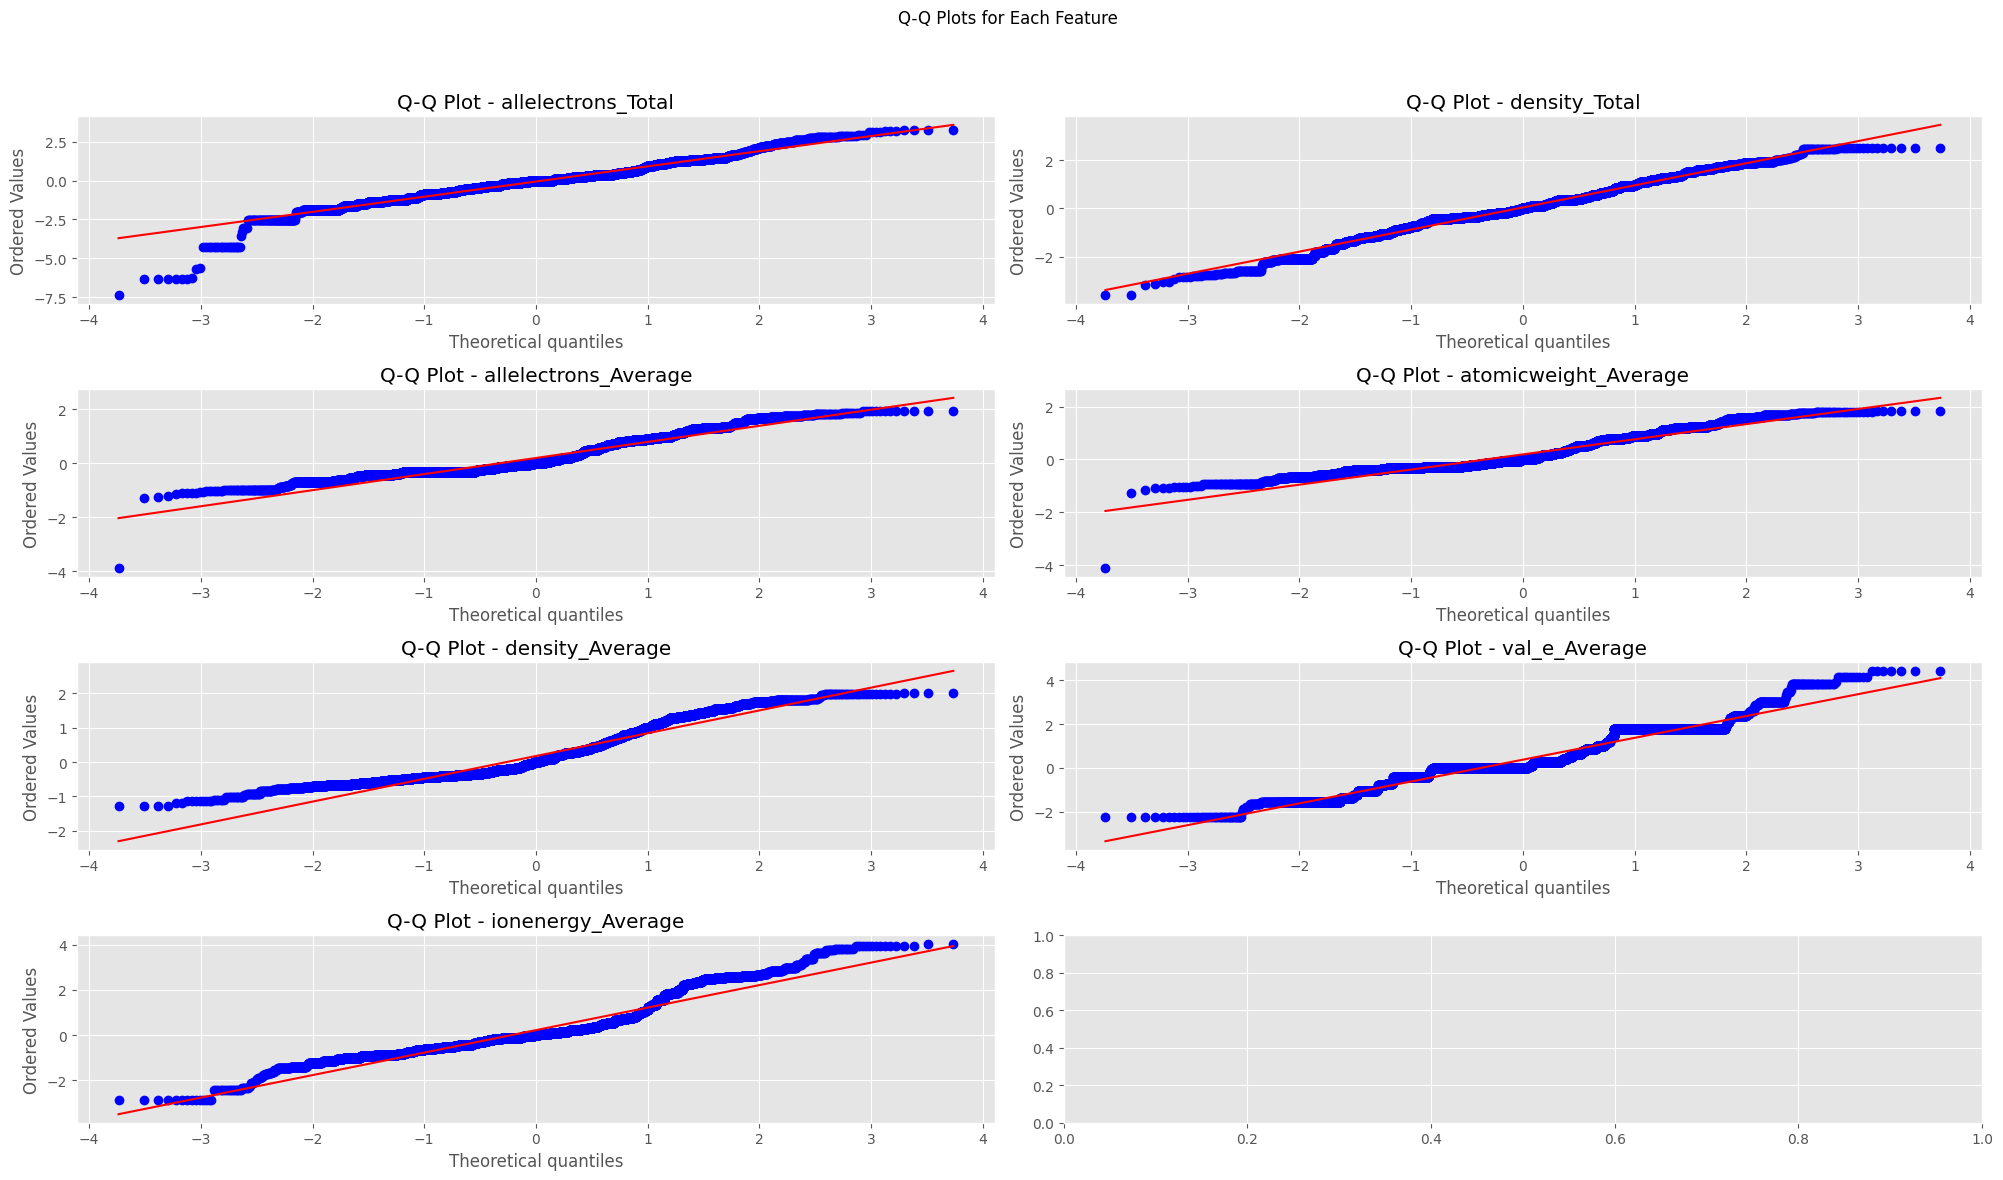

In [56]:
# Plot Q-Q plots for each scaled training features
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = scaled_df.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, (column, ax) in enumerate(zip(scaled_df.columns, axes)):
    probplot(scaled_df[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

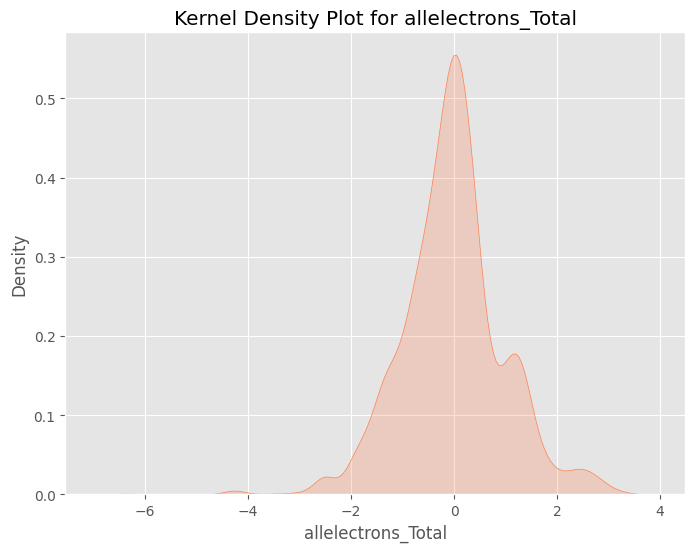

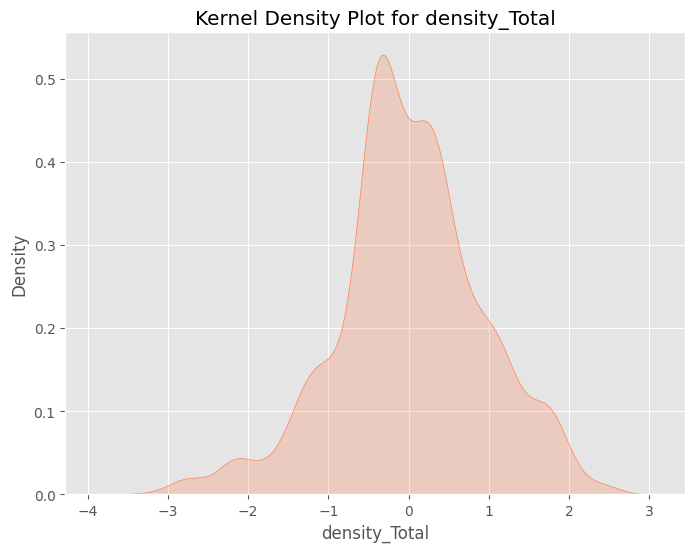

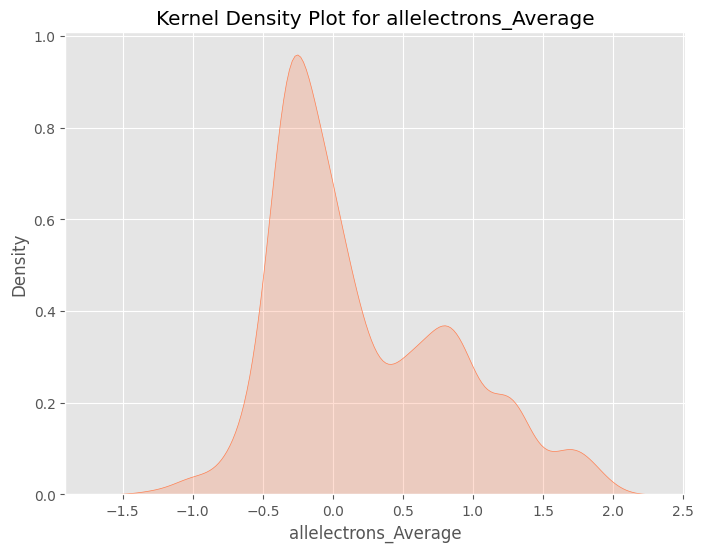

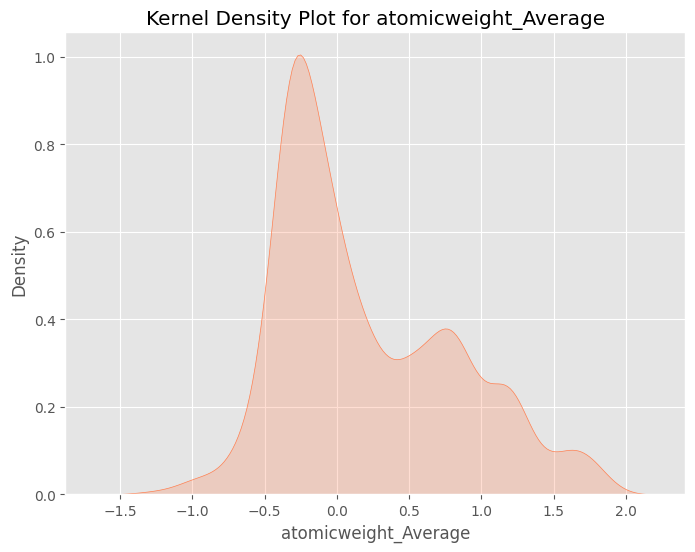

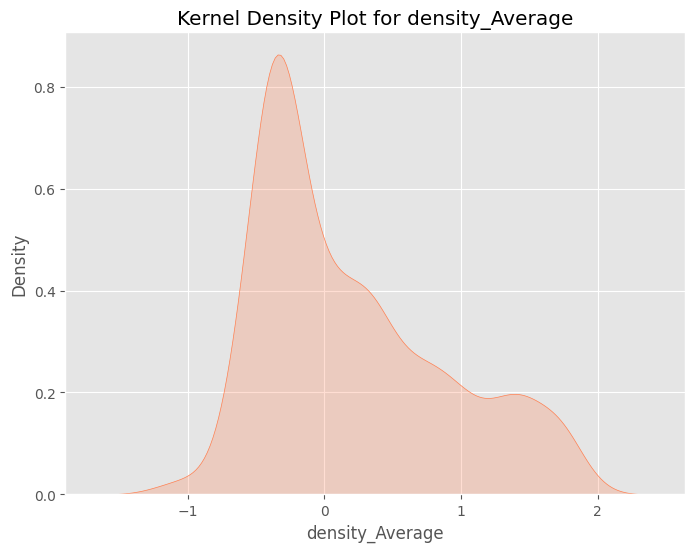

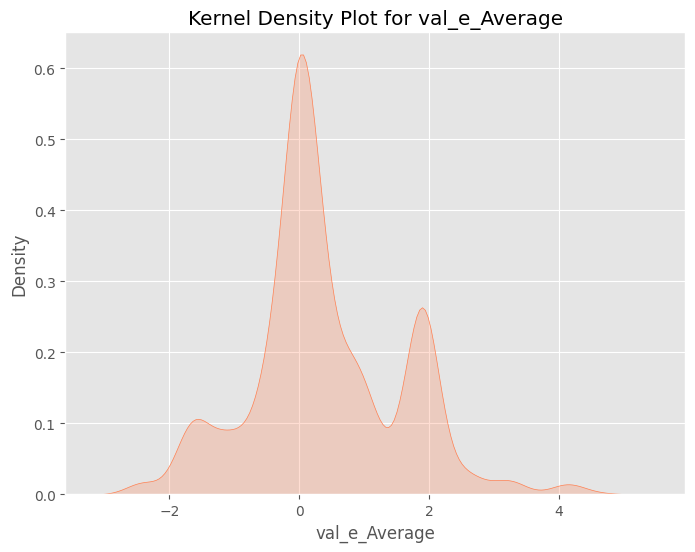

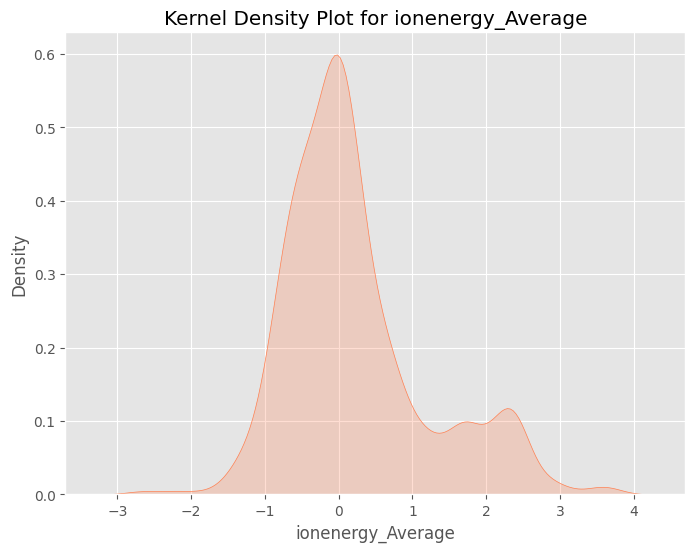

In [57]:
# data distribution of each scaled training feature using Kernel Density Plot
for column in scaled_df_val.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(scaled_df_val[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

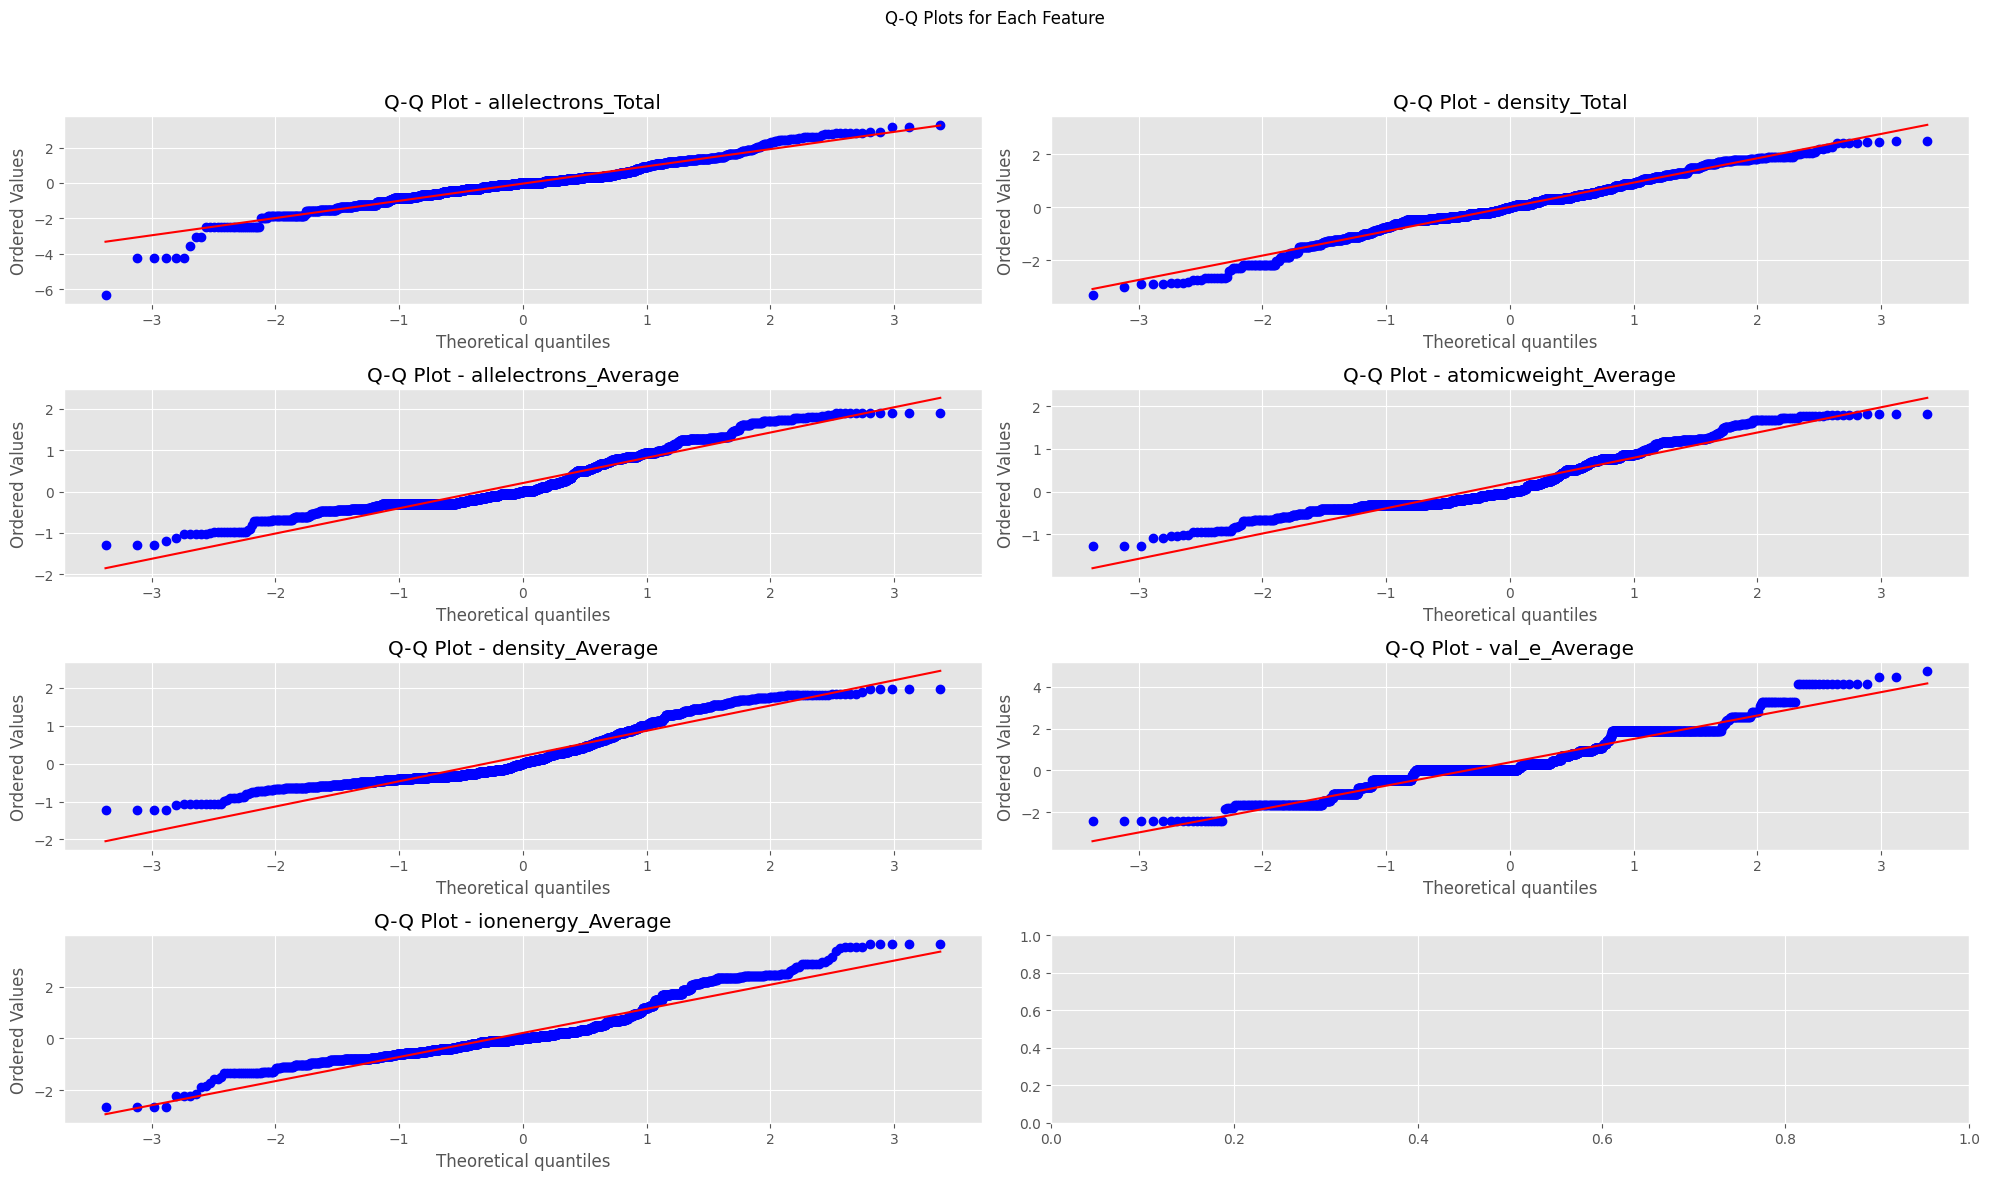

In [58]:
# Plot Q-Q plots for each scaled validation features
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = scaled_df_val.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, (column, ax) in enumerate(zip(scaled_df_val.columns, axes)):
    probplot(scaled_df_val[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

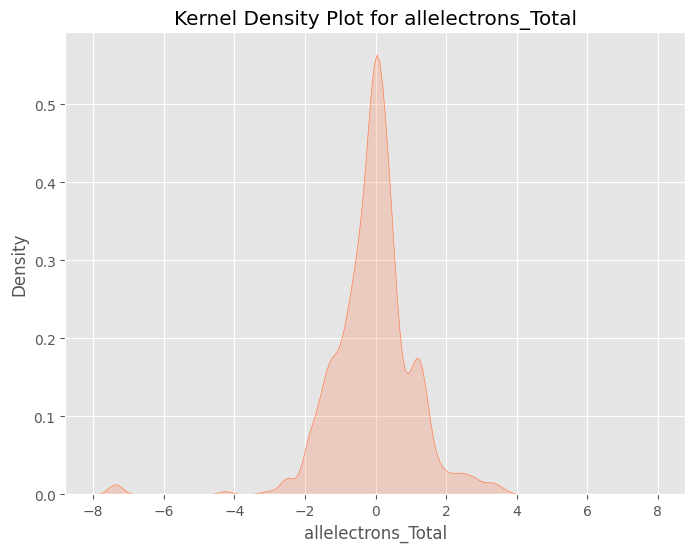

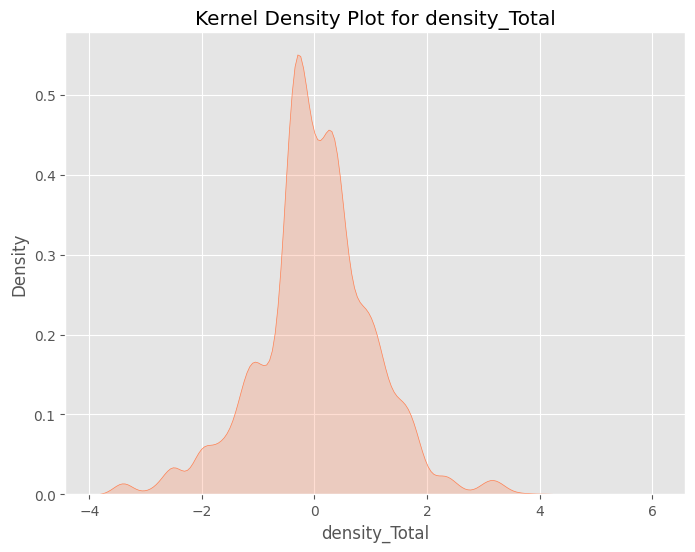

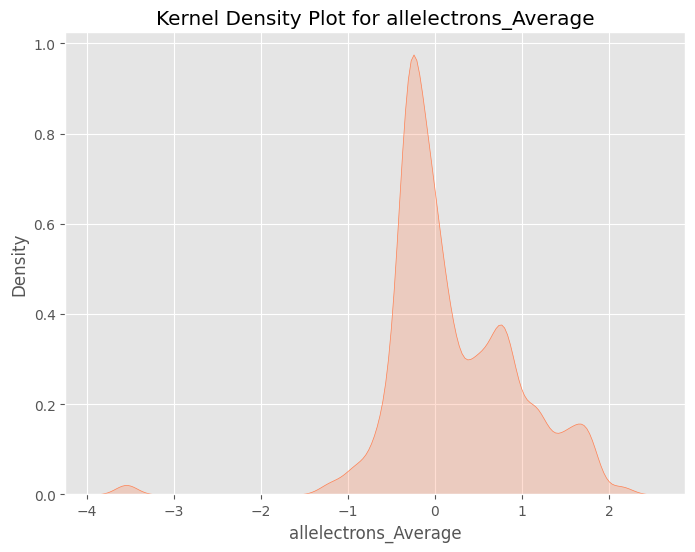

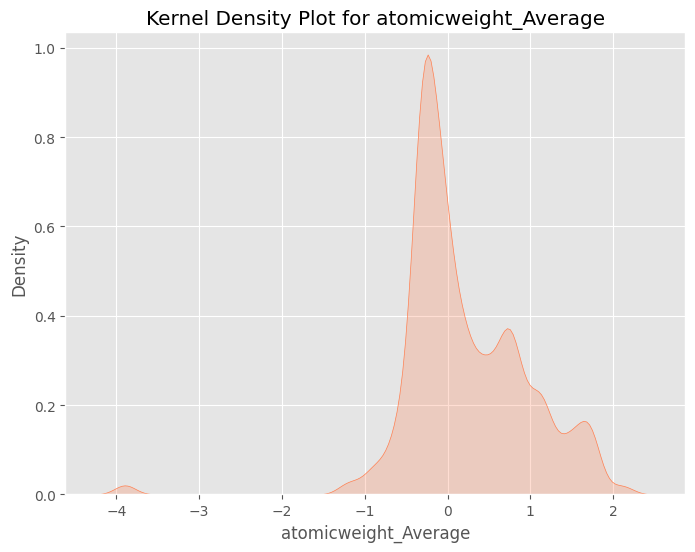

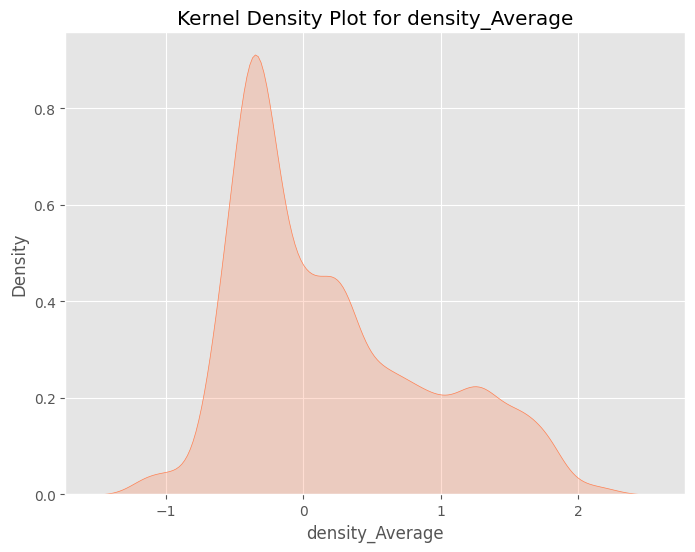

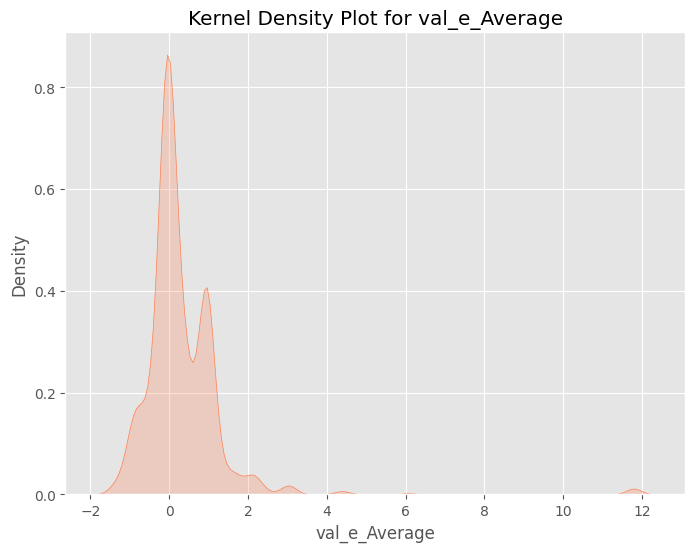

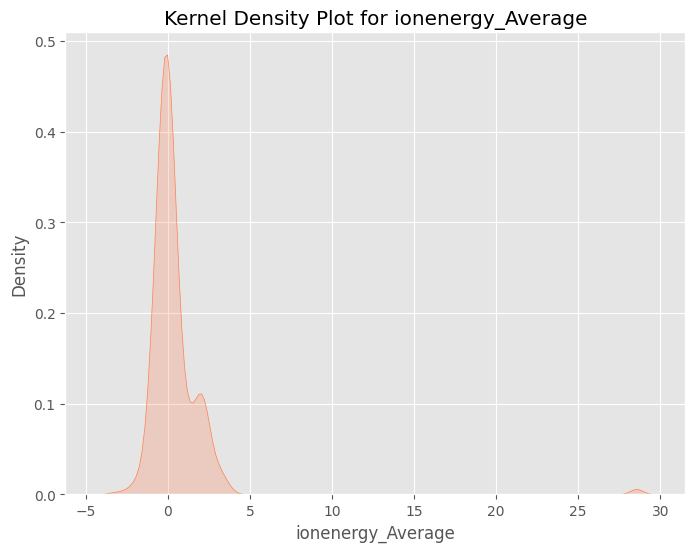

In [59]:
# data distribution of each scaled test data features using Kernel Density Plot
for column in scaled_test_df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(scaled_test_df[column], color='coral', fill=True)
    plt.title(f'Kernel Density Plot for {column}')
    plt.show()

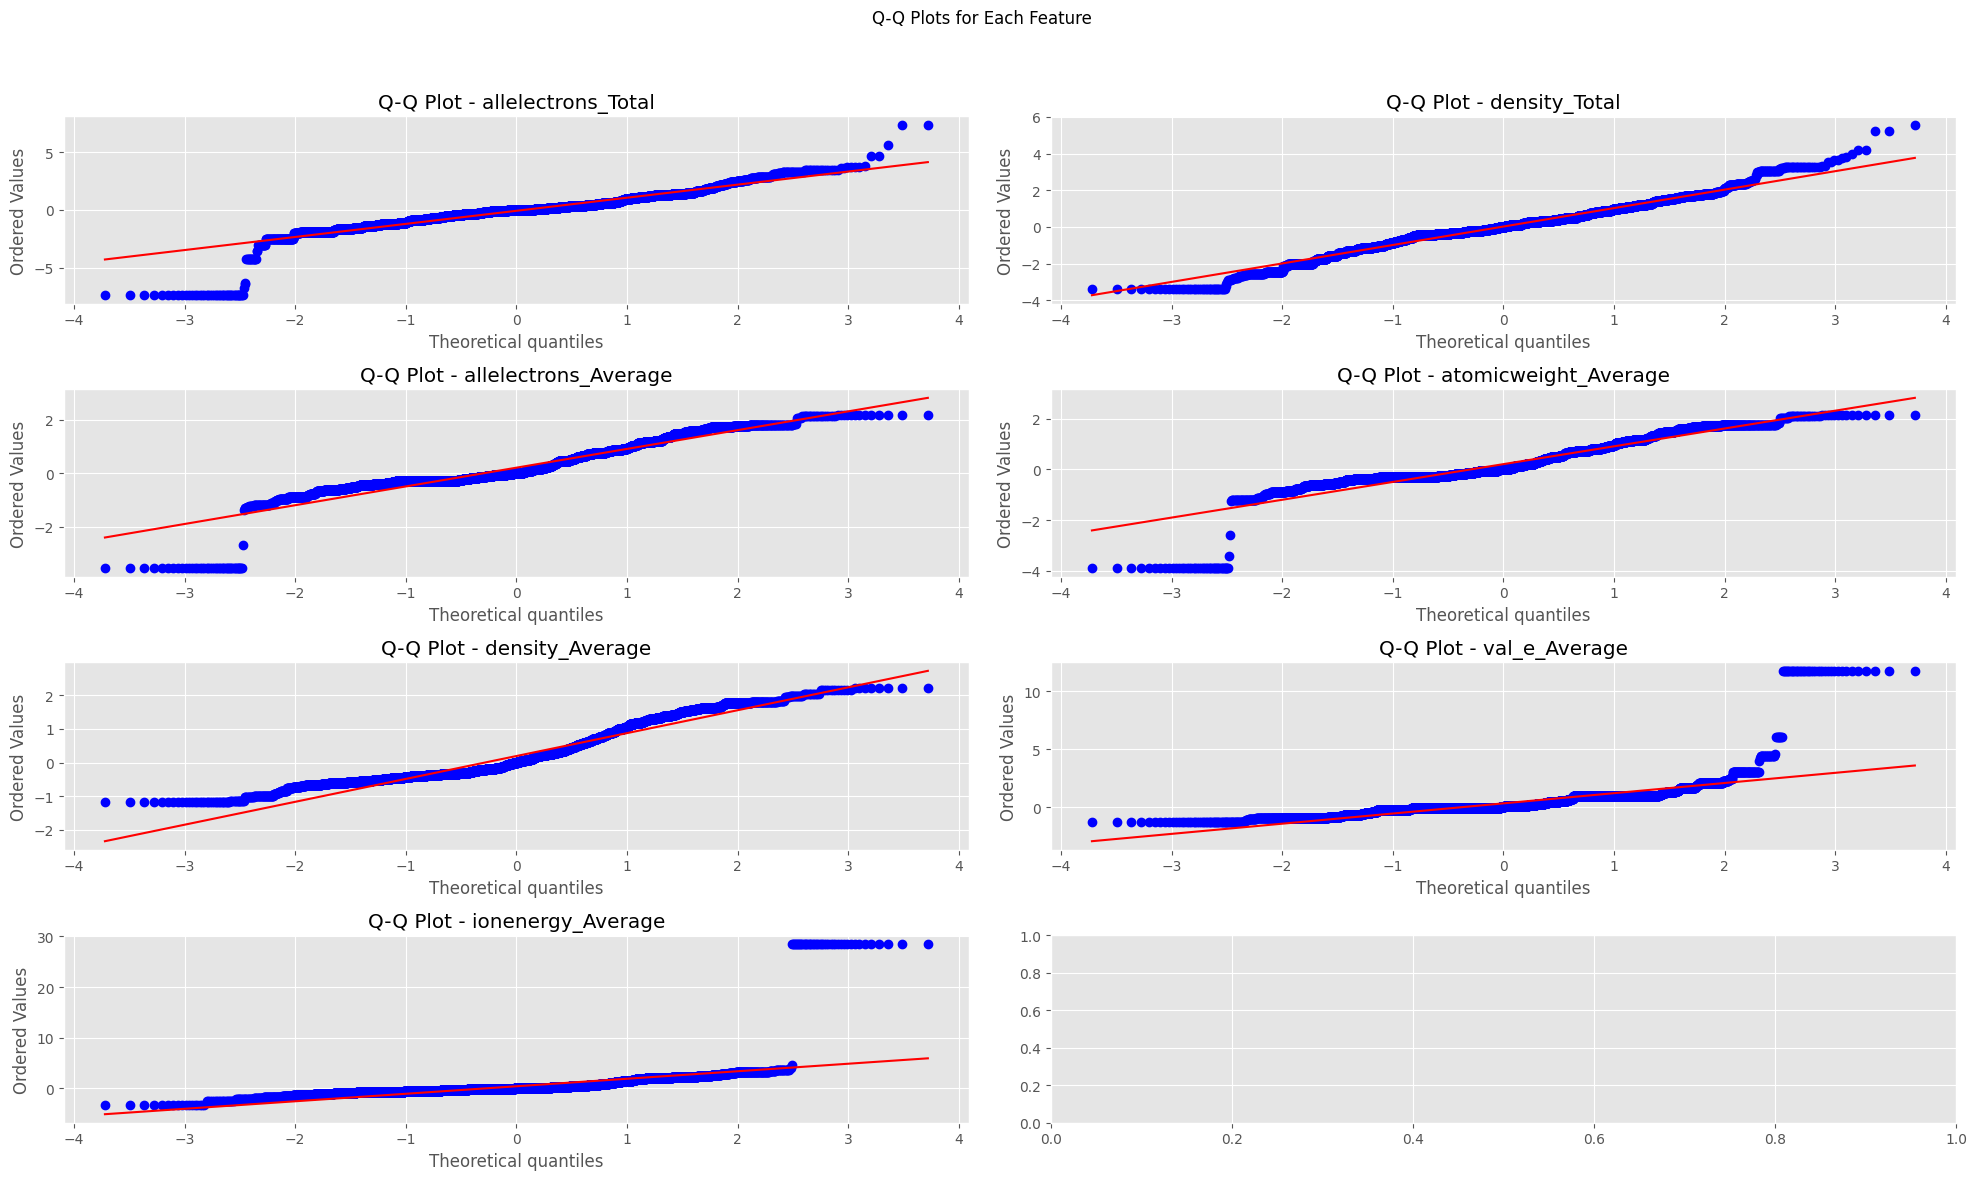

In [60]:
# Plot Q-Q plots for each scaled test data features
# Set the number of subplots per row
subplots_per_row = 2
# Calculate the number of rows needed
num_features = scaled_test_df.shape[1]
num_rows = (num_features - 1) // subplots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 3 * num_rows))
fig.suptitle('Q-Q Plots for Each Feature')

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Plot Q-Q plots for each feature
for i, (column, ax) in enumerate(zip(scaled_test_df.columns, axes)):
    probplot(scaled_test_df[column], plot=ax)
    ax.set_title(f'Q-Q Plot - {column}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2 style='color:red'>PCA</h2>

In [61]:
# Apply PCA to reduce dimensionality
pca = PCA()
X_train_pca = pca.fit_transform(scaled_df)
X_val_pca = pca.transform(scaled_df_val)
X_test_pca = pca.transform(scaled_test_df)

In [62]:
len(scaled_df_val)

1865

In [63]:
len(X_val_pca)

1865

In [64]:
id_train = df_train_no_outliers['id']
id_test = mohs_hardness_test_data['id']

<h2 style='color:red'>Model Creation</h2>

In [65]:
# Create RandomForestRegressor object
rf_regressor = RandomForestRegressor()

In [66]:
# Define the hyperparameter probability distribution for random search
param_dist = {'pca__n_components': [None] + list(range(1, X_train.shape[1] + 1)),
              'regressor__n_estimators': randint(10, 200),
              'regressor__max_features': ['auto', 'sqrt', 'log2'],
              'regressor__max_depth': [None] + list(range(5, 30, 5)),
              'regressor__min_samples_split': [2, 5, 10],
              'regressor__min_samples_leaf': [1, 2, 4],
              'regressor__bootstrap': [True, False]}

In [67]:
# Create KFold cross-validator
kfcv = KFold(n_splits=10, random_state=42, shuffle=True)

In [68]:
# Create a pipeline with PCA and Linear Regression
pipeline = Pipeline([
    ('pca', pca),
    ('regressor', rf_regressor)
])

In [69]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='neg_median_absolute_error',
                                   cv=kfcv,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV on the PCA-transformed training data
random_search.fit(X_train_pca, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [None, 1, 2, 3, 4,
                                                              5, 6, 7],
                                        'regressor__bootstrap': [True, False],
                                        'regressor__max_depth': [None, 5, 10,
                                                                 15, 20, 25],
                                        'regressor__max_features': ['auto',
                                                                    'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ba9d2c8a260>},
                   random_state=42, scoring='neg_median_absolute_error',
                   verbose=2)

In [70]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_pca, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=30; total time=   1.0s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=30; total time=   1.0s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=97; total time=   2.2s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=97; total time=   2.2s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=30; total time=   1.0s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=30; total time=   1.0s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=97; total time=   2.3s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=97; total time=   2.2s
[CV] END pca__n_components=6, regressor__bootstrap=False, regressor__max_depth=10, regressor__max_features

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [None, 1, 2, 3, 4,
                                                              5, 6, 7],
                                        'regressor__bootstrap': [True, False],
                                        'regressor__max_depth': [None, 5, 10,
                                                                 15, 20, 25],
                                        'regressor__max_features': ['auto',
                                                                    'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ba9d2c8a260>},
                   random_state=42, scoring='neg_median_absolute_error',
                   verbose=2)

In [71]:
# Get the best hyperparameters from RandomSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'pca__n_components': 5, 'regressor__bootstrap': True, 'regressor__max_depth': 15, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 68}


In [72]:
# Get the best model from RandomSearchCV
best_rf_model = random_search.best_estimator_
best_rf_model

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('regressor',
                 RandomForestRegressor(max_depth=15, max_features='auto',
                                       min_samples_split=10,
                                       n_estimators=68))])

In [73]:
# Model Evaluation on validation data
y_val_pred = best_rf_model.predict(X_val_pca)
rf_reg_mae = median_absolute_error(y_val, y_val_pred)
print(f'Training Median Absolute Error: {rf_reg_mae:.2f}')

Training Median Absolute Error: 0.73


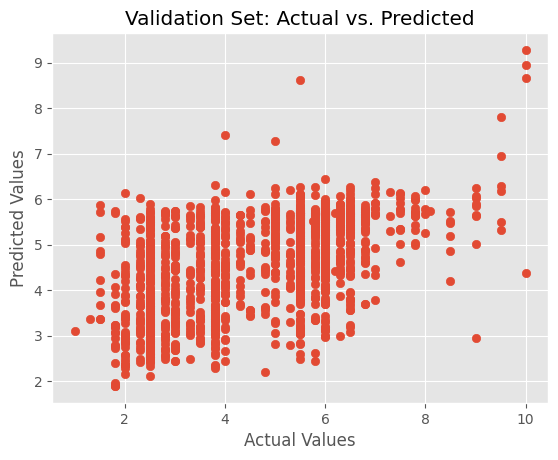

In [74]:
# Visualize the predicted values vs. actual values on the validation set
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs. Predicted')
plt.show()

In [75]:
# Make prediction on test set
y_pred = best_rf_model.predict(X_test_pca)

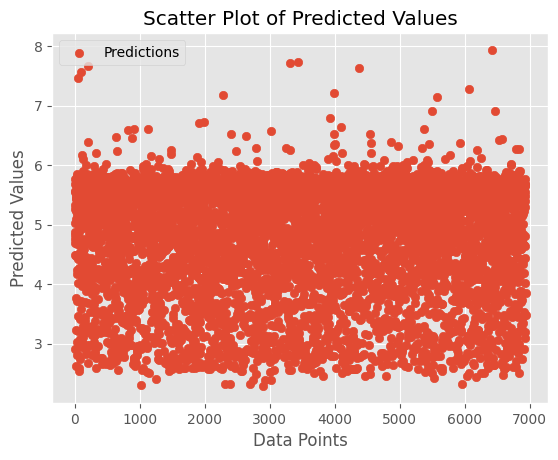

In [76]:
# Scatter plot of predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predictions')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot of Predicted Values')
plt.show()

In [77]:
# Combine Predictions with IDs for the expected output
output_df = pd.DataFrame({'id': id_test, 'Hardness': y_pred})
output_df.head()

,id,Hardness
0,10407,4.492428
1,10408,4.877152
2,10409,5.757770
3,10410,5.566003
4,10411,5.332809


In [78]:
output_df.shape

(6939, 2)

In [79]:
# Save the predictions to a CSV file
output_df.to_csv('rf_predictions.csv', index=False)